## Group: Jingmin Chen, Tianyu Sun

## Introduction
As one of the seven major arts, film has become an important art form and entertainment carrier, and even an indispensable part of our lives. At the same time, movies can also be regarded as a form of investment that is extremely dependent on capital and industrial standards. Therefore, analyzing movie data can help to seize the development trend of the movie industry. Commercially successful films can not only attract audiences, but also enable film companies to make huge profits. Good directors, experienced actors and many other factors are very important for making good movies. The Internet Movie Database (IMDb) is an online database of movie actors, movies, TV shows, TV stars and movie productions. IMDb's materials include a lot of information about the film, actors, length, content introduction, ratings, comments, etc.

## Research Question

Currently, IMDB ratings are most commonly used for movie ratings. However, well-known directors and actors can always bring the expected box office income, but can not guarantee a high imdb score. In this project, we will build a movie grading model based on a large amount of movie data. Based on the existing movie data, we will predict the IMDB score of the movie. The score of the movie can objectively reflect the quality of the movie.

For the real world, the IMDB score of a high box office movie is not necessarily high, but the IMDB box office with a high rating must be very high. Therefore, building a movie rating prediction system is of great significance to the expected box office of the film, and more importantly, film production Merchants can estimate their box office based on the IMDB score, which has a great impact on their publicity.

## Approach
Since the data comes from the kaggle website, we directly download the data, the data format is a csv file, use different data visualization methods for different data, and use a line chart to visualize each released movie data and box office data. The budget of a movie directly affects the quality of the movie, and the box office of the movie also affects the rating of the movie. The dependent variable is the rating of the movie. The relationship between the independent variable and the dependent variable can be analyzed using a correlation matrix or a heat map. In addition, we can use a histogram , Box plot, scatter plot and bar chart and other graphics for visual analysis.

In this project, we use the IMDB score as the response variable to predict each variable. For movie ratings, since the dependent variable is a continuous type and is a prediction model, we use KNN, random forest, and SVM to predict the score.The performance of the three models is used as the weight of the combined model, and the output of the three independent models is combined into a whole model using weighted combination.

For the evaluation of the model, we mainly use the root mean square error (rmse) to evaluate the model, but when the dimensions are different, rmse is difficult to measure the effect of the model. At this time, other evaluation indicators are needed to evaluate the model. In this project, We also use the R^2 score, rmse refers to the square root of the difference between the predicted result and the true result, the smaller the rmse, the better the model. The R^2 score is also called the coefficient of determination. The denominator is understood as the degree of dispersion of the original data. The numerator is the error between the predicted data and the original data. The division between the two can eliminate the effect of the degree of dispersion of the original data. The stronger the interpretation ability of y, the better the model fits the data. Conversely, the closer to 0, the worse the model fit.

In [145]:
# Load python libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
import seaborn as sns
from sklearn.metrics import mean_squared_error, make_scorer

%matplotlib inline

pd.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings("ignore")

Load data from github

In [146]:
df = pd.read_csv("https://raw.githubusercontent.com/TTZUO/DAV-6150/master/movie_metadata.csv")
print(df.shape)
df.head()

(5043, 28)


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


We have 5043 observations of 28 variables. The response variable “imdb_score” is numerical, and the predictors are mixed with numerical and categorical variables.

In [147]:
# check the information of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

In [148]:
# check the describe for each numerical column
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [149]:
# find missing values in each column and sort according to the missing value
missing_dt = df.isna().sum().reset_index().rename(columns = {"index":"name",0:"missing"}).sort_values(by = 'missing',ascending = False)
missing_dt

,name,missing
8,gross,884
22,budget,492
26,aspect_ratio,329
21,content_rating,303
16,plot_keywords,153
23,title_year,108
1,director_name,104
4,director_facebook_likes,104
2,num_critic_for_reviews,50
14,actor_3_name,23


Since we have missing data, so we will import missingno library to see the visualization of missing data

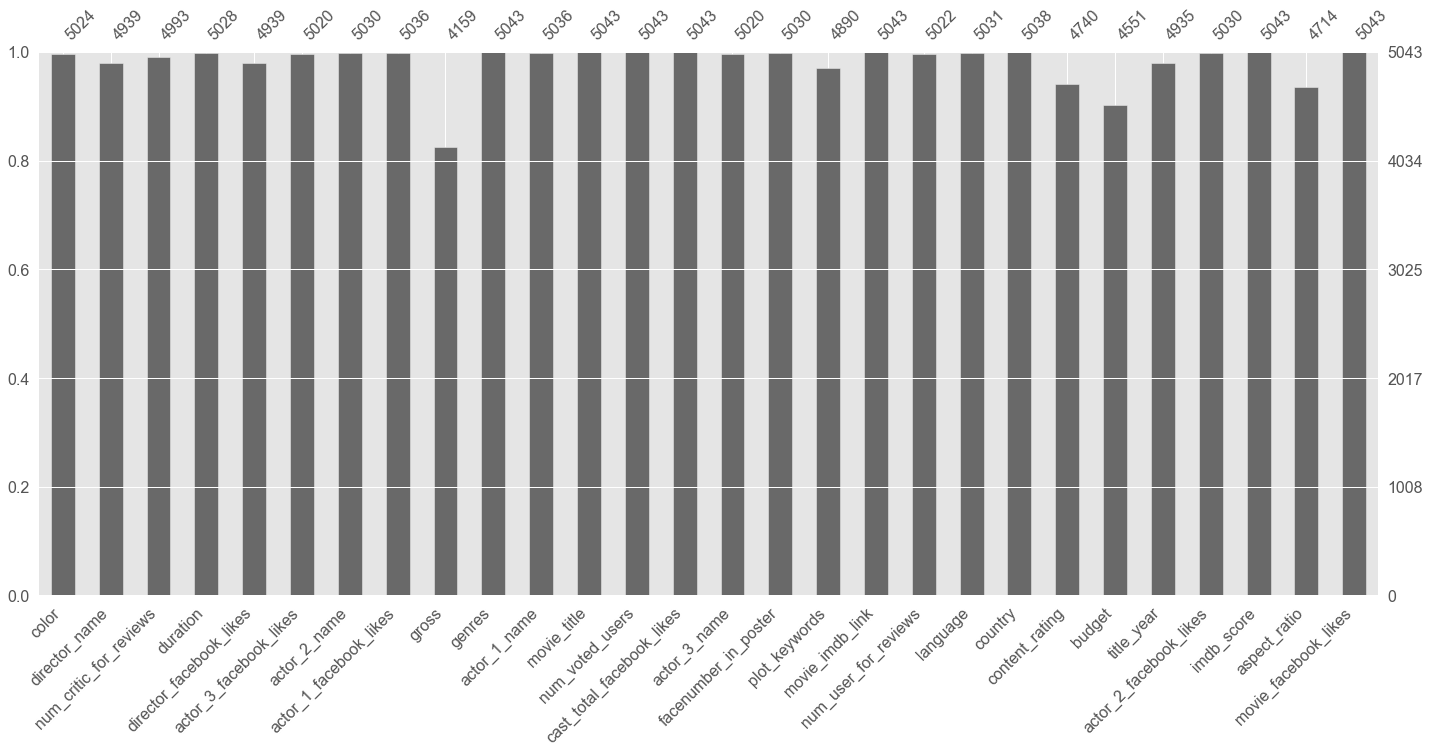

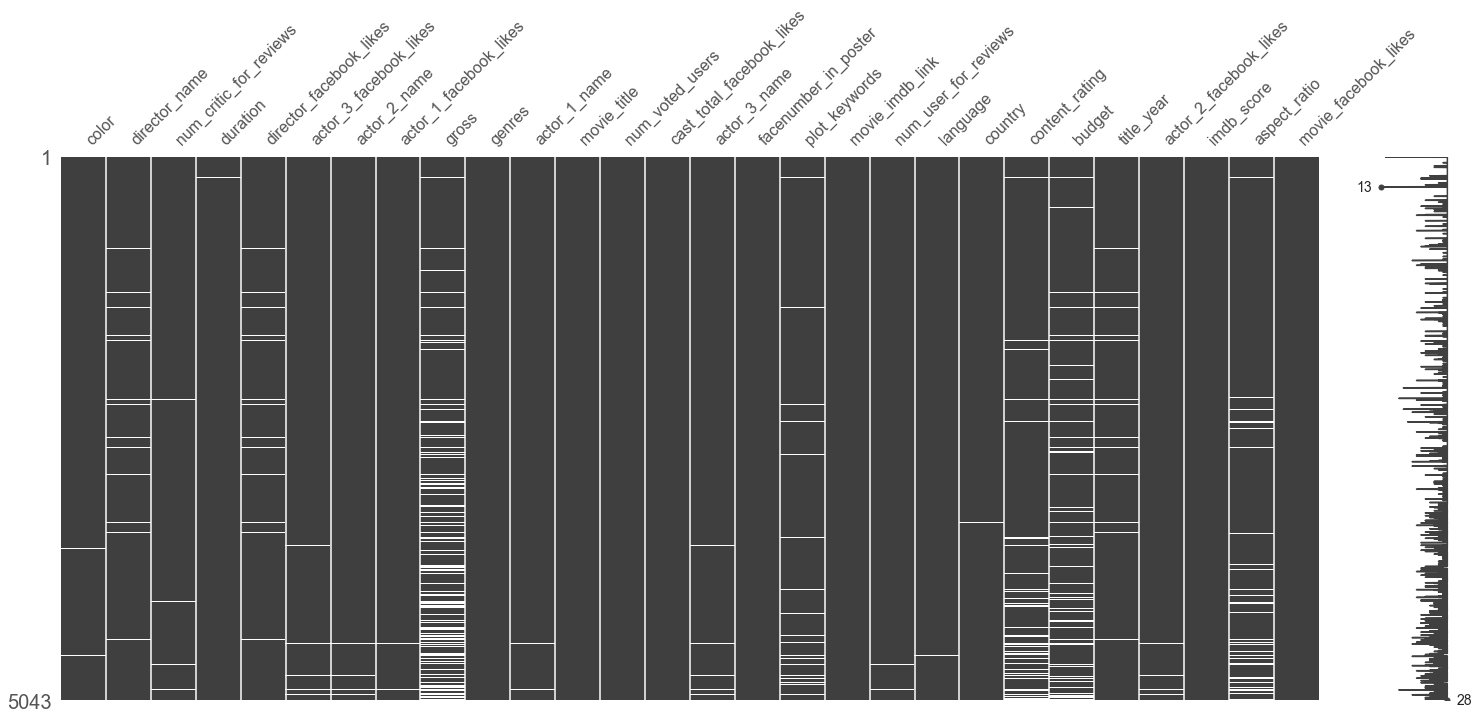

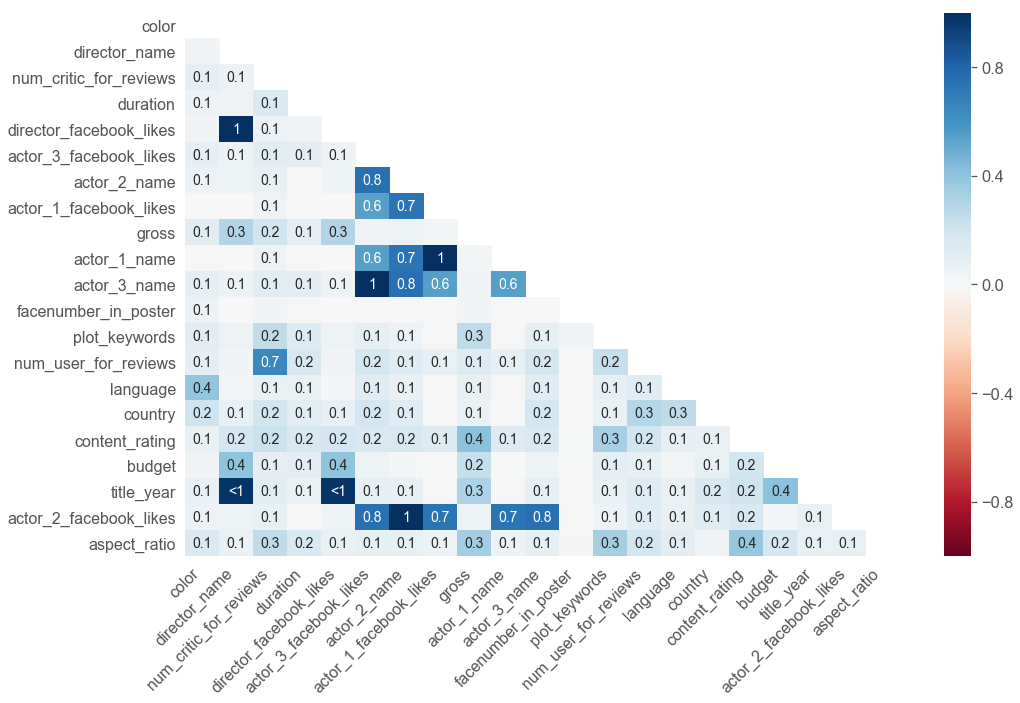

In [150]:
#import missingno library
import missingno as msno

# visualize the amount of missing data
msno.bar(df);

# use missingnos matrix to find the pattern of missing data
msno.matrix(df)
msno.heatmap(df, figsize = (16,10))

From the first two visualization we can see that most of columns have missing data, especially 'gross', 'budget', 'aspect_ratio' and 'content_rating', from the heatmap we can see that these four columns only have small correlation with other columns	

## EDA and Data Preparation

Explore visualization for numerical data and categorical data

In [151]:
# According to the data type of each column, split the data
df_int = df.ix[:,df.dtypes != 'object']
df_cat = df.ix[:,df.dtypes == 'object']

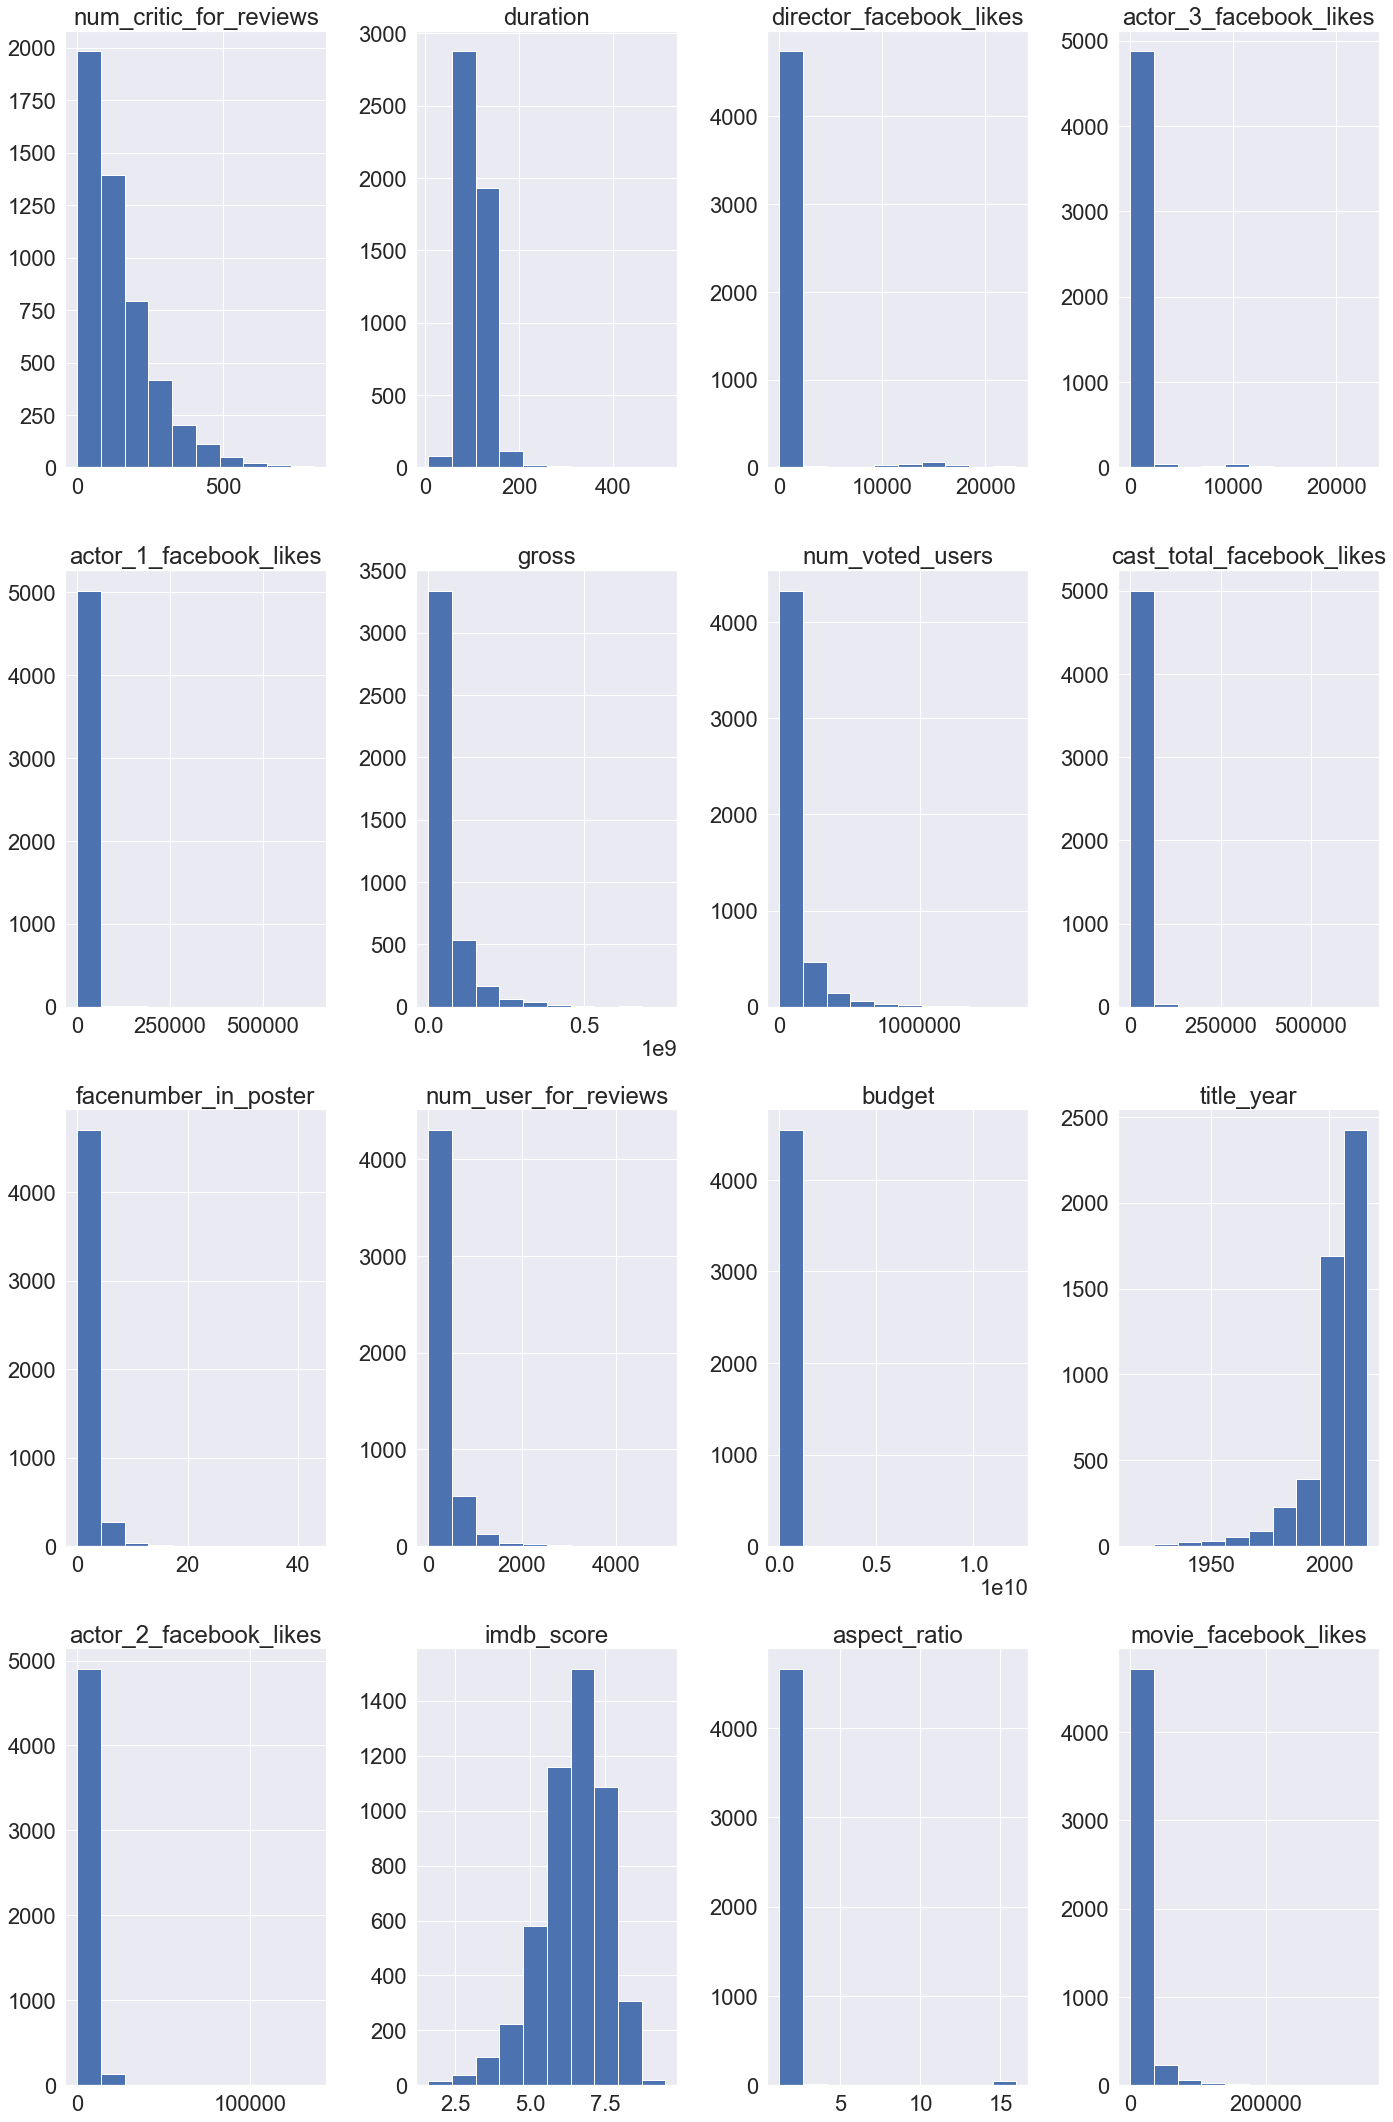

In [152]:
# plot numerical data
import seaborn as sns
plt.figure(figsize = (20, 30))
j=1
sns.set(font_scale=2)
for i in df_int.columns :   
    plt.subplot(4,4,j) 
    plt.hist(df_int[i])
    plt.title('%s' %i)
    j=j+1 #add 1 to go to the next subplot 

plt.tight_layout()
#show results    
plt.show()

imbd_score appear to be approximately normally, num_critic_for_reviews, num_voted_users, num_user_for_reviews, duration, movie_facebook_likes, gross, facenumber_in_poster are appear to be slightly right skewed, others appears to be clustered

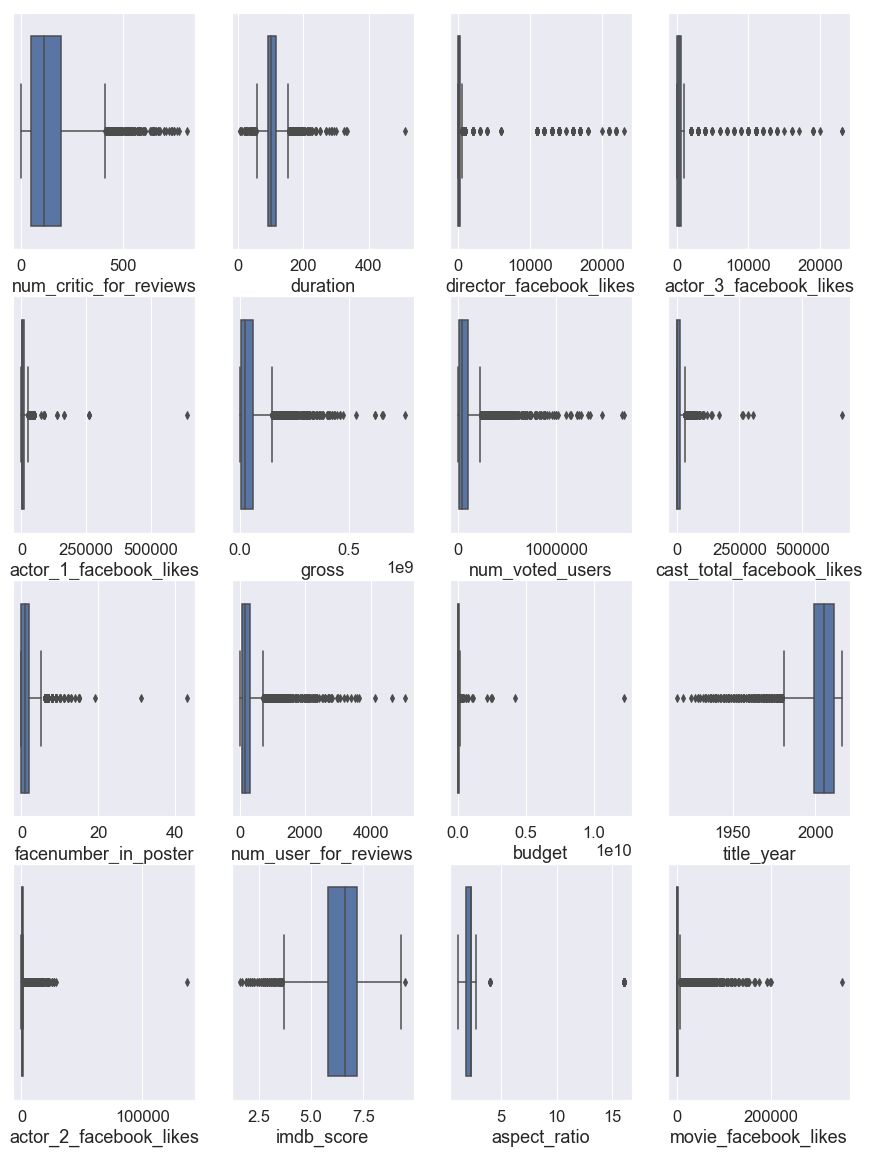

In [153]:
# Use the box plot to check the outliers for numerical data
plt.figure(figsize=(15,20))

#ignore warnings
np.warnings.filterwarnings('ignore')
sns.set(font_scale=1.5)
#use an index to identify the spot of the subplot
j=1

for k in df_int.columns :   #for each numeric variable graph a boxplot 
    plt.subplot(4,4,j) 
    sns.boxplot(x=k, data=df_int);
    j=j+1

#show results    
plt.show()

From the box plot we can see that most of the columns have outlers, so we will consider use StandardScaler later

### handle missing data

Use KNNImputer to fill the missing numerical data

In [154]:
#import module
from sklearn.impute import KNNImputer
#impute the values using K value of 70
imputer = KNNImputer(n_neighbors=70, weights="uniform")

#take the array results and transform into a dataframe
df_int=pd.DataFrame(imputer.fit_transform(df_int),columns=df_int.columns.tolist())

#show results
df_int.head(5)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,723.000000,178.000000,0.0,855.000000,1000.0,7.605058e+08,886204.0,4834.0,0.0,3054.000000,2.370000e+08,2009.000000,936.0,7.9,1.780,33000.0
1,302.000000,169.000000,563.0,1000.000000,40000.0,3.094042e+08,471220.0,48350.0,0.0,1238.000000,3.000000e+08,2007.000000,5000.0,7.1,2.350,0.0
2,602.000000,148.000000,0.0,161.000000,11000.0,2.000742e+08,275868.0,11700.0,1.0,994.000000,2.450000e+08,2015.000000,393.0,6.8,2.350,85000.0
3,813.000000,164.000000,22000.0,23000.000000,27000.0,4.481306e+08,1144337.0,106759.0,0.0,2701.000000,2.500000e+08,2012.000000,23000.0,8.5,2.350,164000.0
4,9.457143,88.685714,131.0,13.814286,131.0,5.561023e+05,8.0,143.0,0.0,4.342857,1.793066e+06,2007.785714,12.0,7.1,2.904,0.0


#### Prepped Data Review 
Rerun the plot for numerical data after we handled the missing data

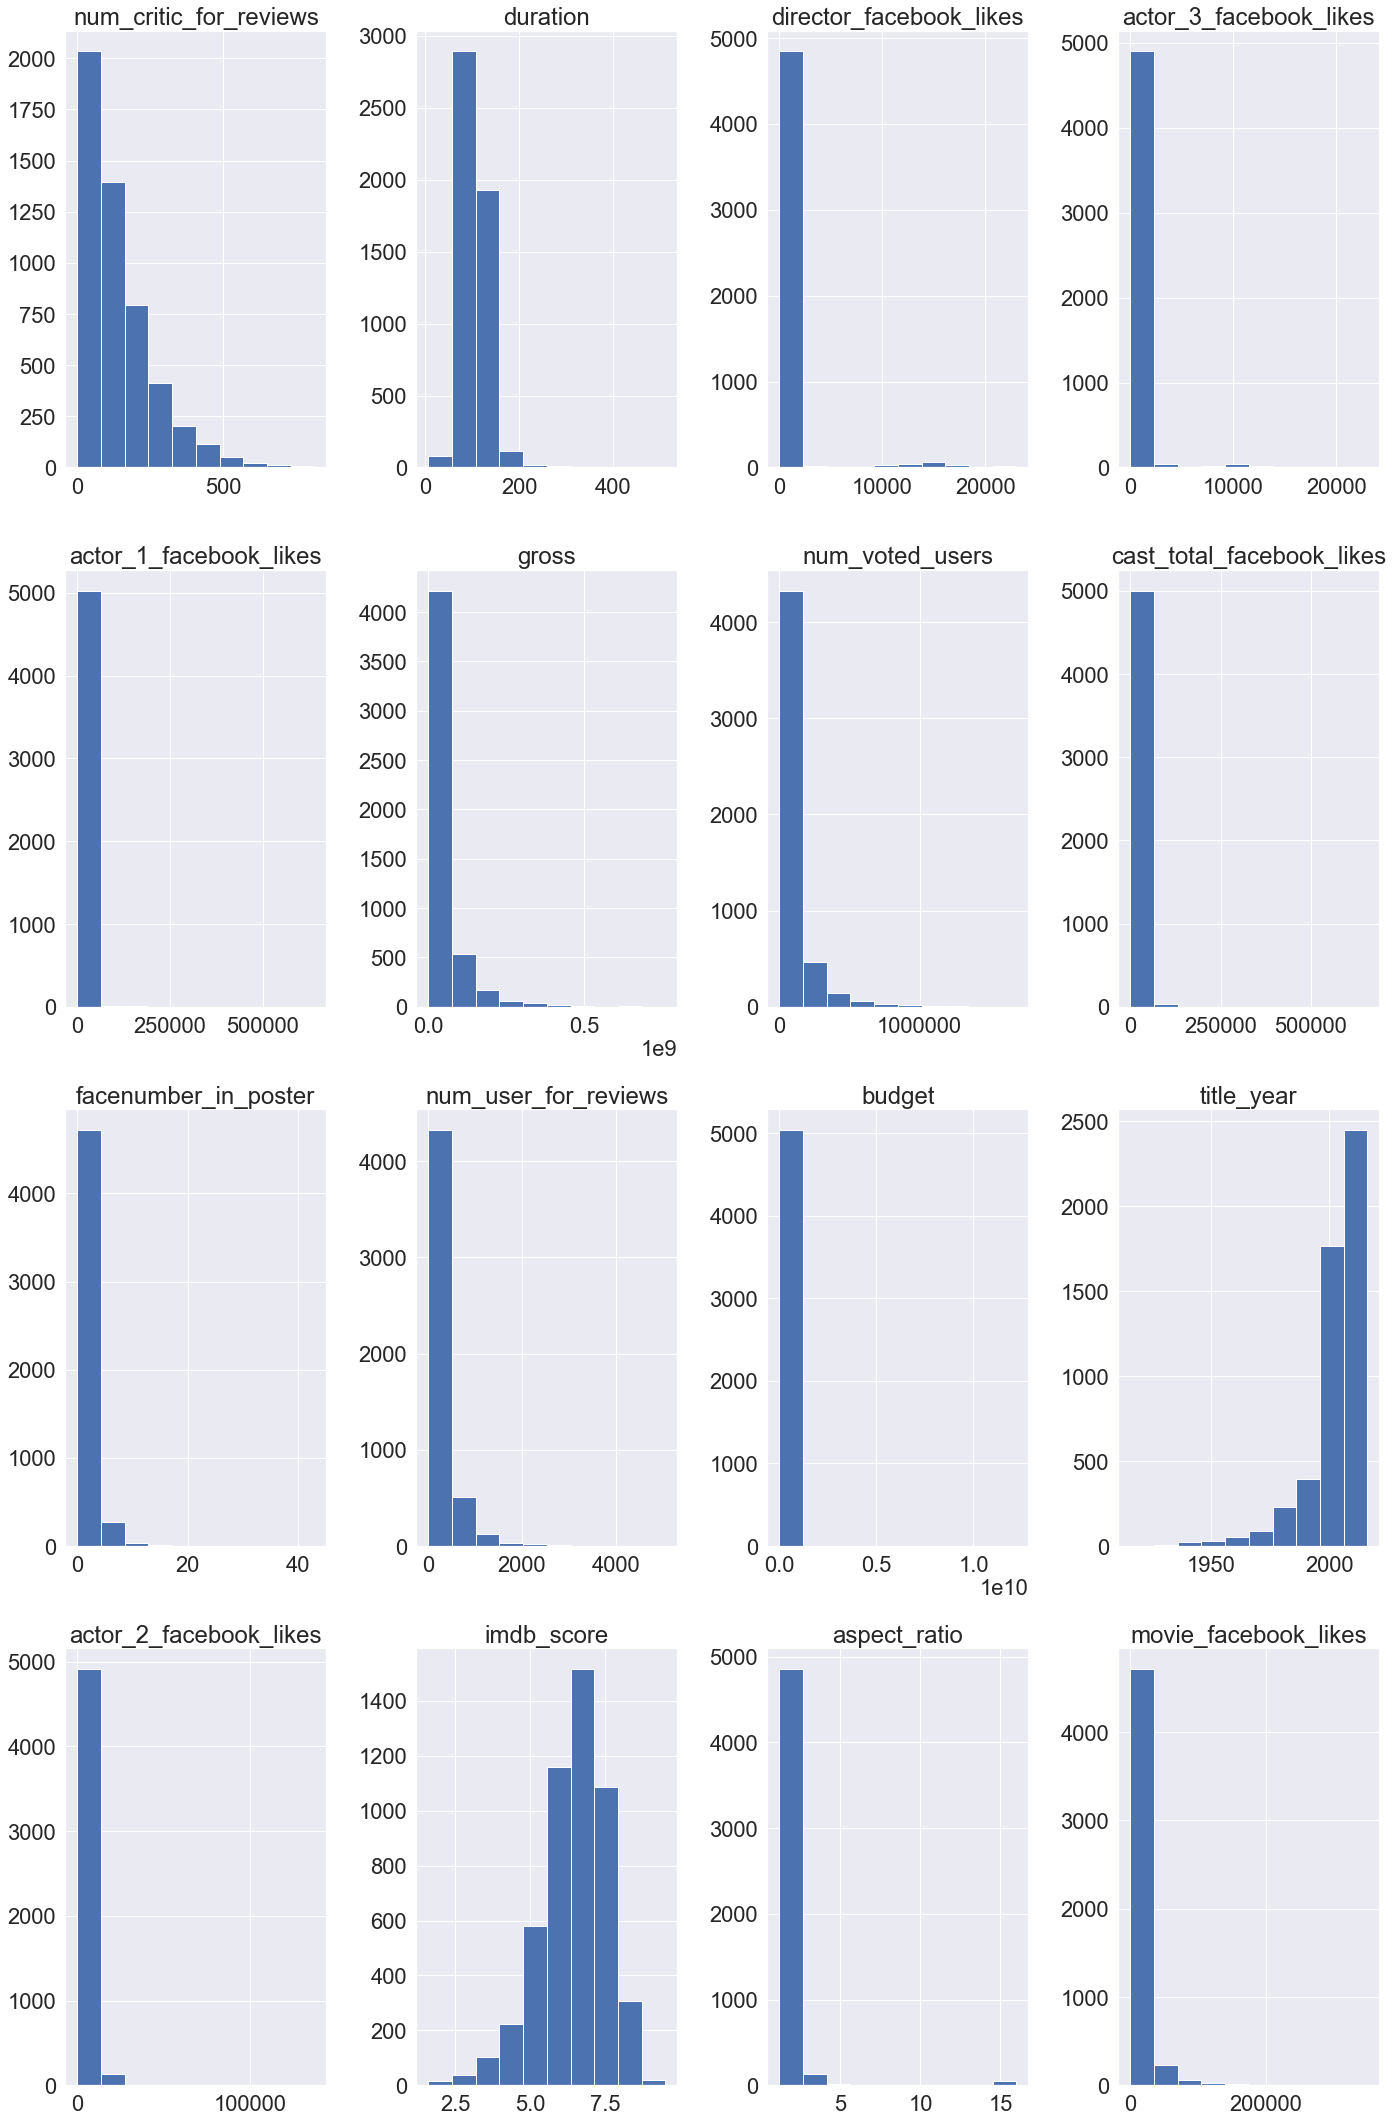

In [155]:
# plot numerical data
import seaborn as sns
plt.figure(figsize = (20, 30))
j=1
sns.set(font_scale=2)
for i in df_int.columns :   
    plt.subplot(4,4,j) 
    plt.hist(df_int[i])
    plt.title('%s' %i)
    j=j+1 #add 1 to go to the next subplot 

plt.tight_layout()
#show results    
plt.show()

From the above plot we can see that after we handled the missing data, the distribution did not change

Rerun box plot and compare with original box plot

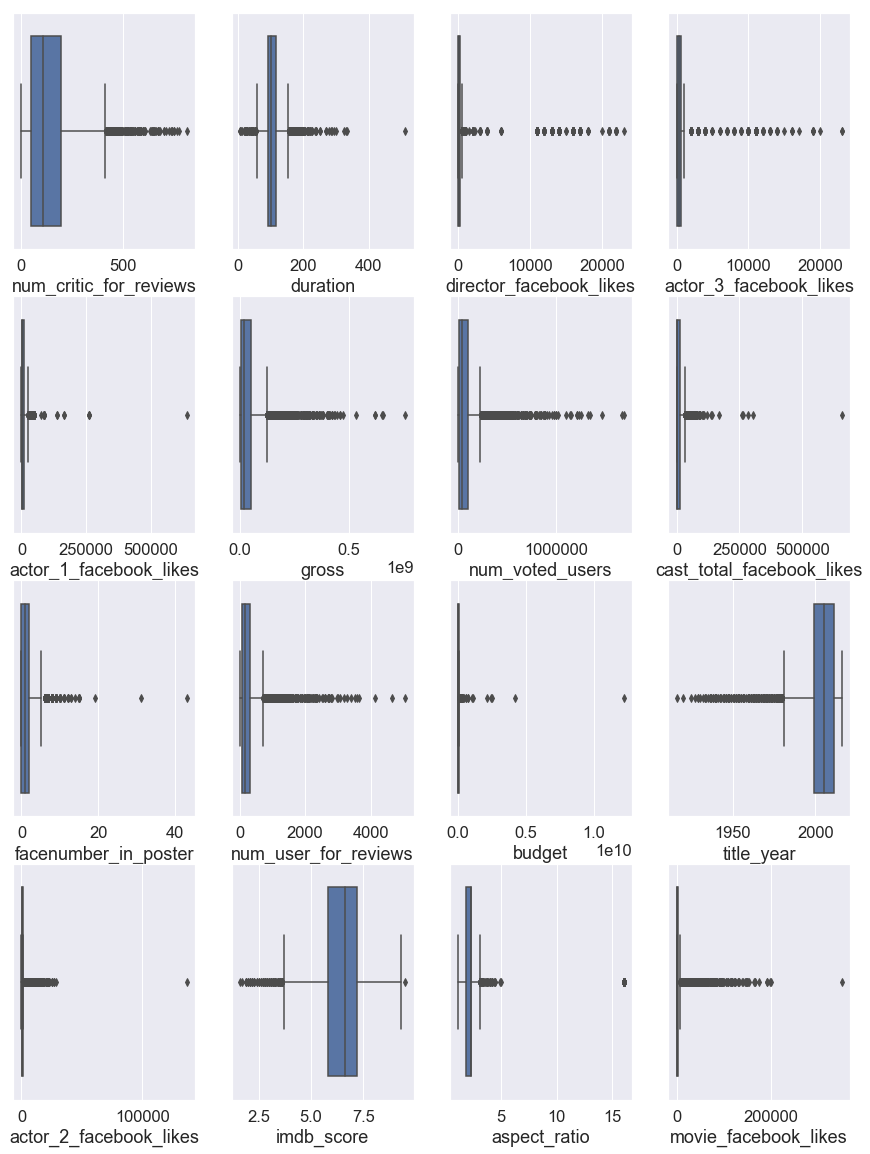

In [156]:

plt.figure(figsize=(15,20))

#ignore warnings
np.warnings.filterwarnings('ignore')
sns.set(font_scale=1.5)
#use an index to identify the spot of the subplot
j=1

for k in df_int.columns :   #for each numeric variable graph a boxplot 
    plt.subplot(4,4,j) 
    sns.boxplot(x=k, data=df_int);
    j=j+1

#show results    
plt.show()

From the above plot we can see that after we handled the missing data, the distribution did not change

Analyze the categorical data

In [157]:
# check the unique value for each column
df_cat.nunique()

color                 2
director_name      2398
actor_2_name       3032
genres              914
actor_1_name       2097
movie_title        4917
actor_3_name       3521
plot_keywords      4760
movie_imdb_link    4919
language             47
country              65
content_rating       18
dtype: int64

For categorical features, It's hard to plot the insightful visualization in this case, because there are a lot of unique value in each features, except color, language, country and content_rating, so we will only consider these four features for the following works.

In [158]:
df_cat = df_cat[['color','language','country','content_rating']]

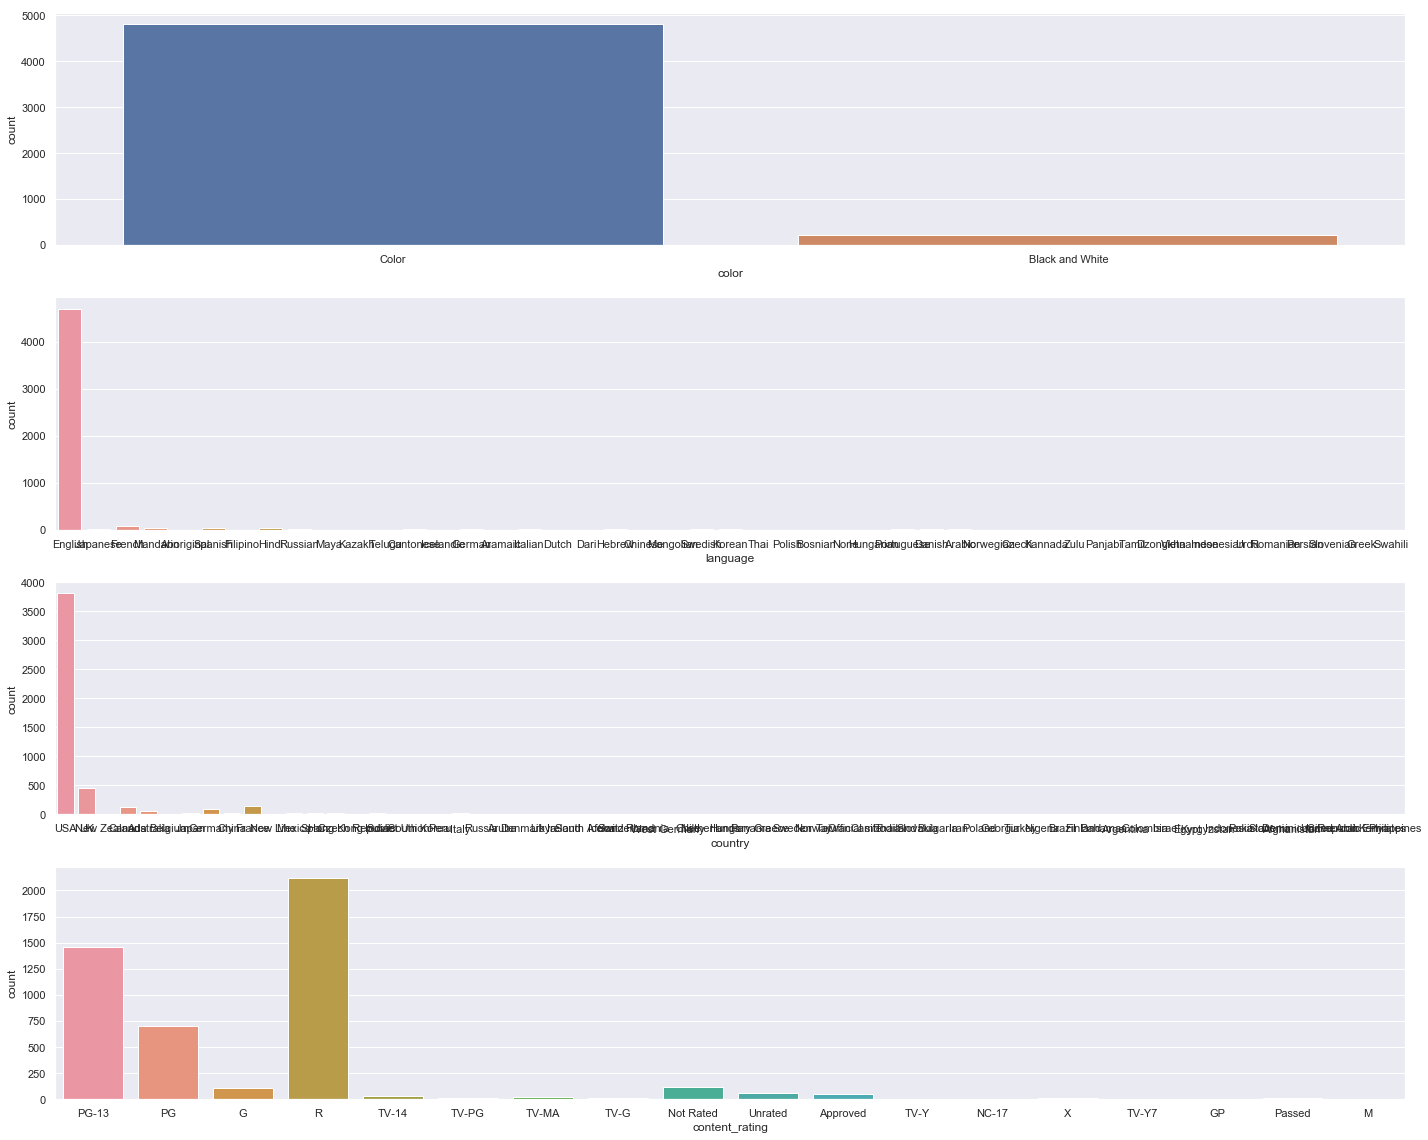

In [159]:
# plot categorical data
fig = plt.figure(figsize = (20, 16))
sns.set(font_scale=1)
for i, col in enumerate(list(df_cat)):
    ax1 = fig.add_subplot(4, 1, i + 1)
    sns.catplot(x=col,data=df_cat, kind='count', ax=ax1)
    plt.close(2)
    plt.tight_layout()

From the above plot, we can see that most of columns only have a few data, so we will combine those columns as 'other', it will make the this categoraical useful

For categorical features, we use the mode to fill in missing values.

In [160]:
for i in df_cat.columns:
    df_cat[i].fillna(df_cat[i].mode()[0],inplace = True)

In [161]:
# use value_counts to count the content_rating column
df_cat['content_rating'].value_counts()

R            2421
PG-13        1461
PG            701
Not Rated     116
G             112
Unrated        62
Approved       55
TV-14          30
TV-MA          20
TV-PG          13
X              13
TV-G           10
Passed          9
NC-17           7
GP              6
M               5
TV-Y7           1
TV-Y            1
Name: content_rating, dtype: int64

According to the history of naming these different content ratings, we find M = GP = PG, X = NC-17. We want to replace M and GP with PG, replace X with NC-17, because these two are what we use nowadays.

In [162]:
df_cat.ix[df_cat['content_rating'] == 'M','content_rating'] = 'PG'
df_cat.ix[df_cat['content_rating'] == 'GP','content_rating'] = 'PG'
df_cat.ix[df_cat['content_rating'] == 'X','content_rating'] = 'NC-17'
df_cat.ix[df_cat['content_rating'] == 'Approved','content_rating'] = 'R'
df_cat.ix[df_cat['content_rating'] == 'Not Rated','content_rating'] = 'R'
df_cat.ix[df_cat['content_rating'] == 'Passed','content_rating'] = 'R'
df_cat.ix[df_cat['content_rating'] == 'Unrated','content_rating'] = 'R'
df_cat.ix[df_cat['content_rating'] == 'TV-14','content_rating'] = 'TV'
df_cat.ix[df_cat['content_rating'] == 'TV-MA','content_rating'] = 'MA'
df_cat.ix[df_cat['content_rating'] == 'TV-PG','content_rating'] = 'PG'
df_cat.ix[df_cat['content_rating'] == 'TV-G','content_rating'] = 'G'
df_cat.ix[df_cat['content_rating'] == 'TV-Y','content_rating'] = 'Y'
df_cat.ix[df_cat['content_rating'] == 'TV-Y7','content_rating'] = 'Y'
df_cat.ix[df_cat['content_rating'] == 'NC-17','content_rating'] = 'NC'

In [163]:
df_cat['content_rating'].value_counts()

R        2663
PG-13    1461
PG        725
G         122
TV         30
NC         20
MA         20
Y           2
Name: content_rating, dtype: int64

Convert content_rating to numerical for regression model

In [164]:
df_cat.ix[df_cat['content_rating'] == 'R','content_rating'] = 0
df_cat.ix[df_cat['content_rating'] == 'PG-13','content_rating'] = 1
df_cat.ix[df_cat['content_rating'] == 'PG','content_rating'] = 2
df_cat.ix[df_cat['content_rating'] == 'TV','content_rating'] = 3
df_cat.ix[df_cat['content_rating'] == 'G','content_rating'] = 4
df_cat.ix[df_cat['content_rating'] == 'NC','content_rating'] = 5
df_cat.ix[df_cat['content_rating'] == 'MA','content_rating'] = 6
df_cat.ix[df_cat['content_rating'] == 'Y','content_rating'] = 7

More than 96% movies are colored, which indicates that this predictor is nearly constant.

In [165]:
df_cat['color'].value_counts()

Color               4834
 Black and White     209
Name: color, dtype: int64

Convert color to numerical for regression model

In [166]:
df_cat.ix[df_cat['color'] == 'Color','color'] = 0
df_cat.ix[df_cat['color'] == ' Black and White','color'] = 1

Over 95% movies are in English, which means this variable is nearly constant.

In [167]:
df_cat['language'].value_counts()

English       4716
French          73
Spanish         40
Hindi           28
Mandarin        26
German          19
Japanese        18
Italian         11
Cantonese       11
Russian         11
Portuguese       8
Korean           8
Swedish          5
Hebrew           5
Arabic           5
Danish           5
Polish           4
Norwegian        4
Persian          4
Dutch            4
Chinese          3
Thai             3
Dari             2
Zulu             2
Icelandic        2
Romanian         2
Aboriginal       2
Indonesian       2
None             2
Dzongkha         1
Swahili          1
Panjabi          1
Tamil            1
Czech            1
Aramaic          1
Kazakh           1
Bosnian          1
Greek            1
Vietnamese       1
Mongolian        1
Kannada          1
Urdu             1
Slovenian        1
Filipino         1
Maya             1
Hungarian        1
Telugu           1
Name: language, dtype: int64

In [168]:
df_cat.ix[df_cat['language'] != 'English','language'] = 'Other'
df_cat['language'].value_counts()

English    4716
Other       327
Name: language, dtype: int64

In [169]:
df_cat.ix[df_cat['language'] == 'English','language'] = 0
df_cat.ix[df_cat['language'] == 'Other','language'] = 1

Around 79% movies are from USA, 8% from UK, 13% from other countries. So we group other countries together to make this categorical variable with less levels: USA, UK, Others.

In [170]:
# use value_counts to count the country column
df_cat['country'].value_counts()

USA                     3812
UK                       448
France                   154
Canada                   126
Germany                   97
Australia                 55
India                     34
Spain                     33
China                     30
Italy                     23
Japan                     23
Mexico                    17
Hong Kong                 17
New Zealand               15
South Korea               14
Ireland                   12
Denmark                   11
Russia                    11
South Africa               8
Norway                     8
Brazil                     8
Sweden                     6
Poland                     5
Thailand                   5
Netherlands                5
Israel                     4
Iran                       4
Argentina                  4
Romania                    4
Belgium                    4
                        ... 
Greece                     2
Hungary                    2
Kenya                      1
Panama        

In [171]:
df_cat.ix[((df_cat['country'] != 'USA') & (df_cat['country'] != 'UK')),'country'] = 'Other'
df_cat['country'].value_counts()

USA      3812
Other     783
UK        448
Name: country, dtype: int64

In [172]:
df_cat.ix[df_cat['country'] == 'USA','country'] = 0
df_cat.ix[df_cat['country'] == 'Other','country'] = 1
df_cat.ix[df_cat['country'] == 'UK','country'] = 2

#### Prepped Data Review
Rerun the categorical data and compare with previous plot

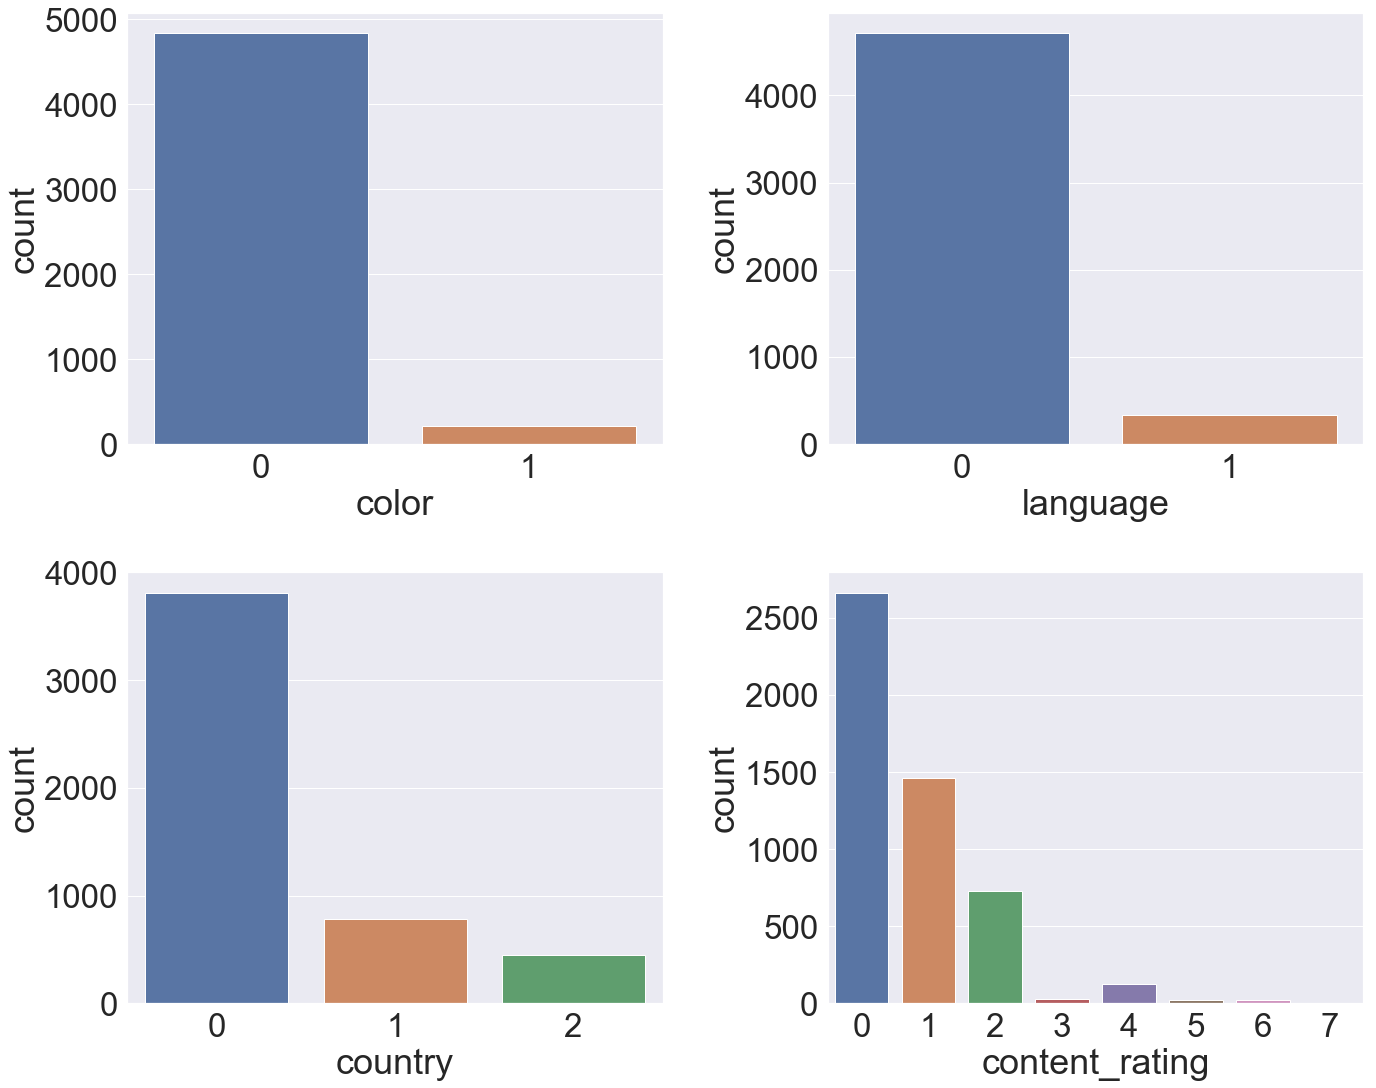

In [173]:
# plot categorical data
fig = plt.figure(figsize = (20, 16))
sns.set(font_scale=3)
for i, col in enumerate(list(df_cat)):
    ax1 = fig.add_subplot(2, 2, i + 1)
    sns.catplot(x=col,data=df_cat, kind='count', ax=ax1)
    plt.close(2)
    plt.tight_layout()

From the bar plot we can see that as we expect, it become clearly and useful for our further work

In [174]:
# combine numerical and categorical data
dt = pd.concat([df_cat,df_int],axis=1)

## Feature engineering
Add the useful features for further work

We have gross and budget information. So let’s add two colums: profit and percentage return on investment for further analysis.

In [175]:
dt['profit'] = dt['gross'] - dt['budget']
dt['return_on_investment_perc'] = (dt['gross'] / dt['budget']) * 100

Text(0, 0.5, 'Movie Count')

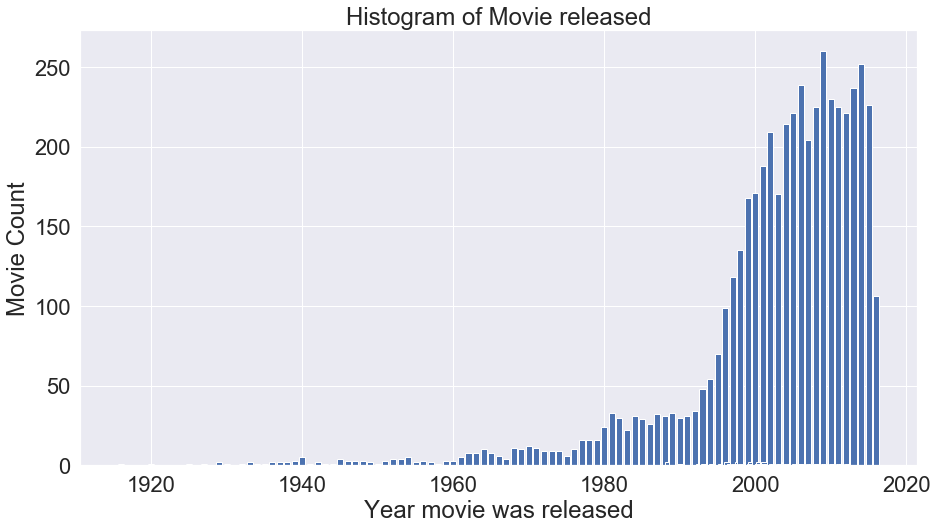

In [177]:
sns.set(font_scale=2)
plt.figure(figsize=(15,8))
year_bar = dt.groupby('title_year')['profit'].count().reset_index()
plt.bar(x = 'title_year',height ='profit',data = year_bar)
plt.title("Histogram of Movie released")
plt.xlabel("Year movie was released")
plt.ylabel("Movie Count")

Movie production just exploded after the year 1990. It could be due to advancements in technology and the commercialization of the internet.

From the graph, we see there aren’t many records of movies released before 1980. It’s better to remove those records because 

Text(15.920000000000002, 0.5, 'Profit $million')

<Figure size 1080x576 with 0 Axes>

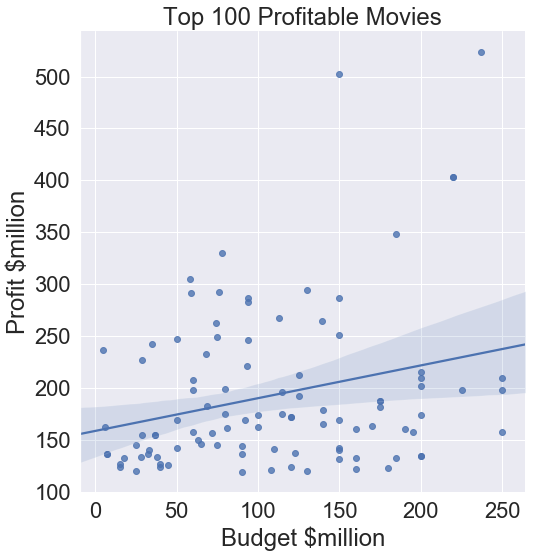

In [178]:
plt.figure(figsize=(15,8))
sns.set(font_scale=2)
bp_lm = dt.ix[(dt['title_year'] >= 2000),['budget','profit']]
bp_lm['budget'] /= 1000000
bp_lm['profit'] /= 1000000
bp_lm = bp_lm.sort_values('profit',ascending = False).head(100)

sns.lmplot(x = 'budget',y = 'profit',data = bp_lm,height=8)
plt.title("Top 100 Profitable Movies")
plt.xlabel("Budget $million")
plt.ylabel("Profit $million")

These are the top 100 movies based on the Profit earned (Gross - Budget). It can be inferred from this plot that high budget movies tend to earn more profit. The trend is almost linear, with profit increasing with the increase in budget.

Text(3.0450000000000017, 0.5, 'Percent Return on Investment')

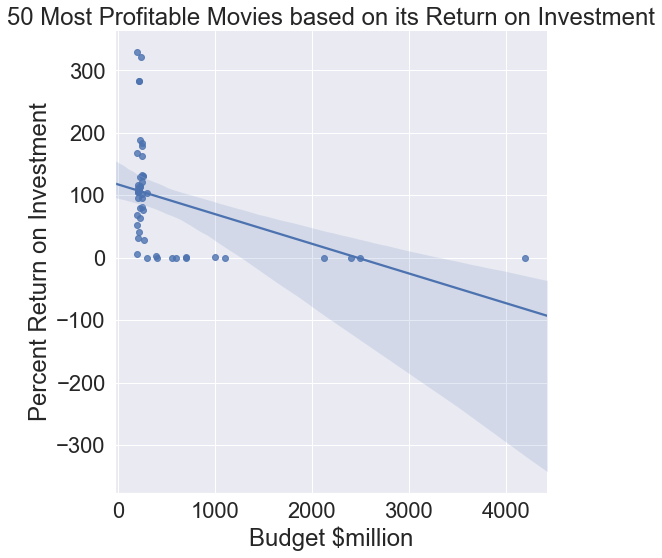

In [179]:

br_lm = dt.ix[(dt['budget'] < 10000000000),['budget','return_on_investment_perc']]
br_lm['budget'] /= 1000000
br_lm = br_lm.sort_values('budget',ascending = False).head(50)
sns.set(font_scale=2)
sns.lmplot(x = 'budget',y = 'return_on_investment_perc',data = br_lm,height=8)
plt.title("50 Most Profitable Movies based on its Return on Investment")
plt.xlabel("Budget $million")
plt.ylabel("Percent Return on Investment")

These are the top 50 movies based on its Percentage Return on Investment ((profit/budget)\*100).

Since profit earned by a movie does not give a clear picture about its monetary success over the years, this analysis, over the absolute value of the Return on Investment(ROI) across its Budget, would provide better results.

As hypothesized, the ROI is high for Low Budget Films and decreases as the budget of the movie increases.

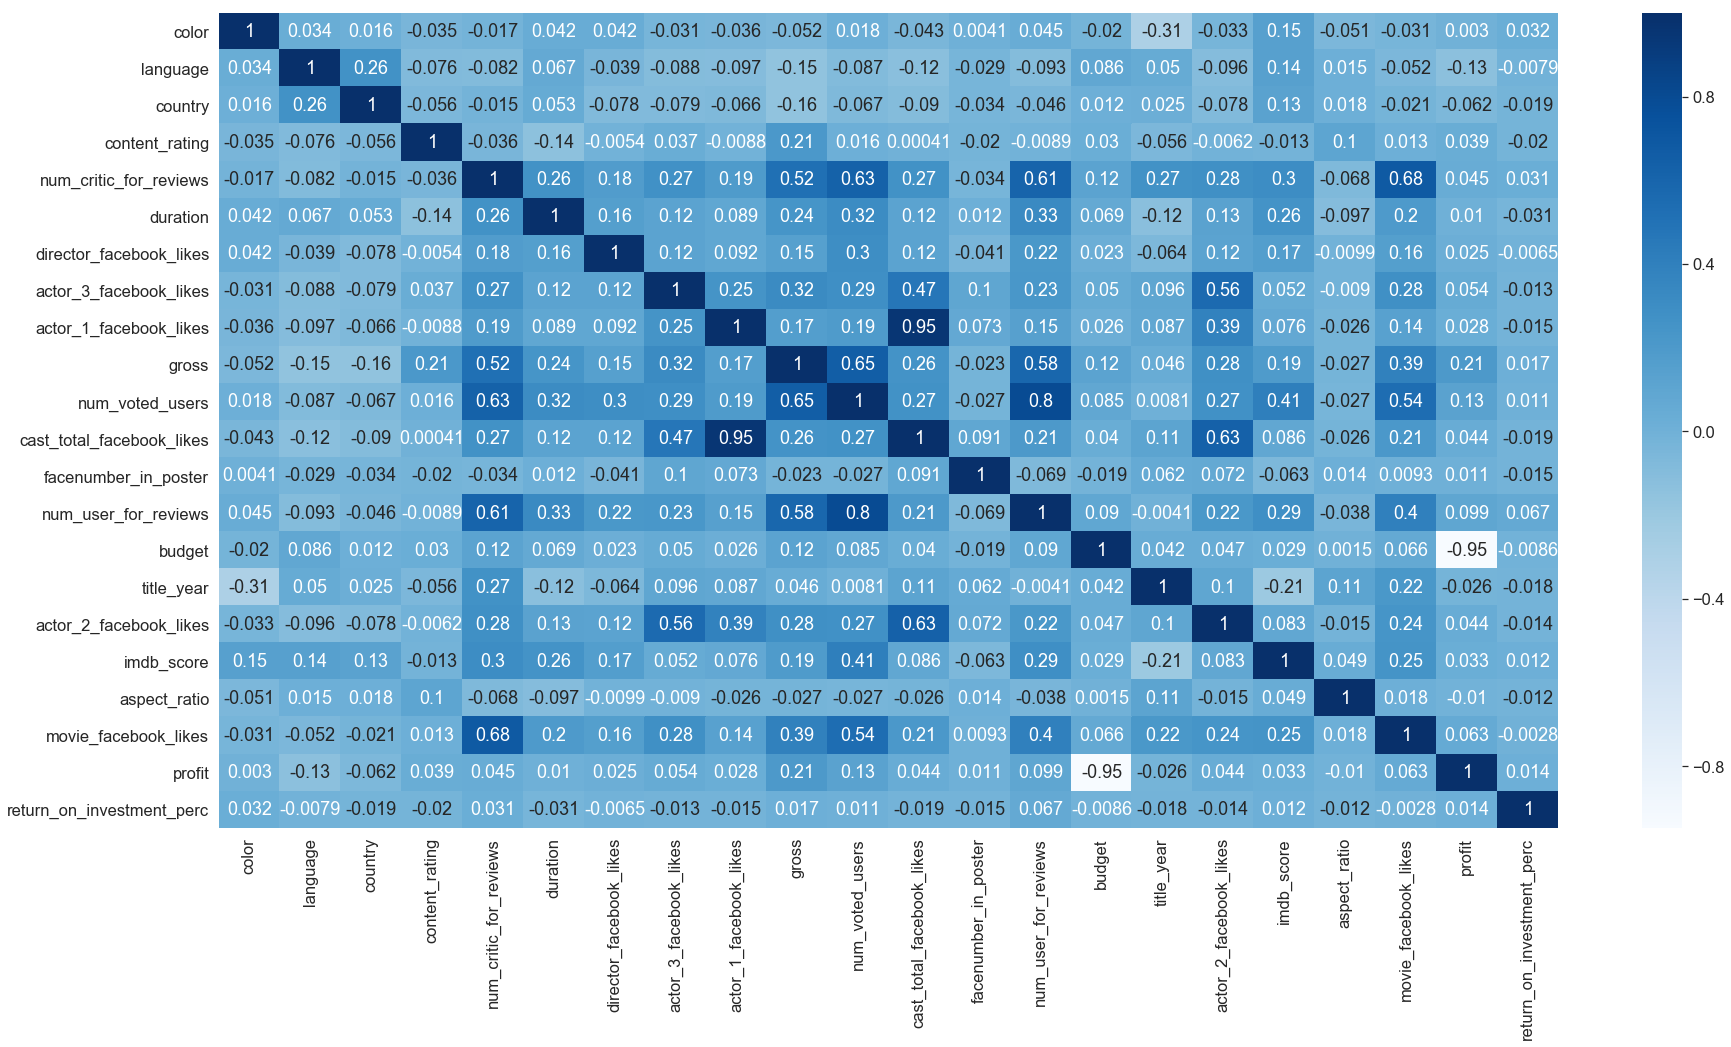

In [180]:
corr = dt.corr()
plt.figure(figsize=(30,15))

sns.set(font_scale=1.5)
_ = sns.heatmap(corr, annot=True, vmax=1, cmap="Blues")

From the heatmap we can see that imbd_score has high corrlation with movie_facebook_likes, num_user_for_reviews, num_voted_users, duration, gross and title_year

Text(0.5, 15.439999999999998, 'imdb score')

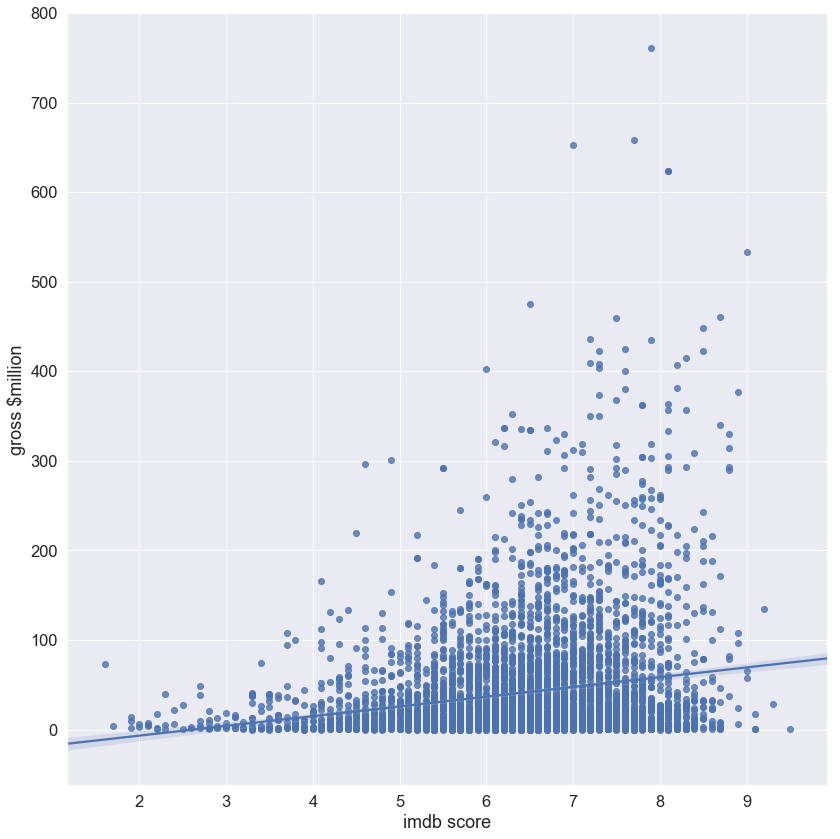

In [35]:
ig = dt[['imdb_score','gross']]
ig['gross'] /= 1000000
sns.lmplot(x ='imdb_score',y = 'gross',data = ig,height=12)

plt.ylabel("gross $million")
plt.xlabel("imdb score")

From the above plot we can see that the imdb_score has a positive relationship with gross

Text(0.5, 15.439999999999998, 'imdb score')

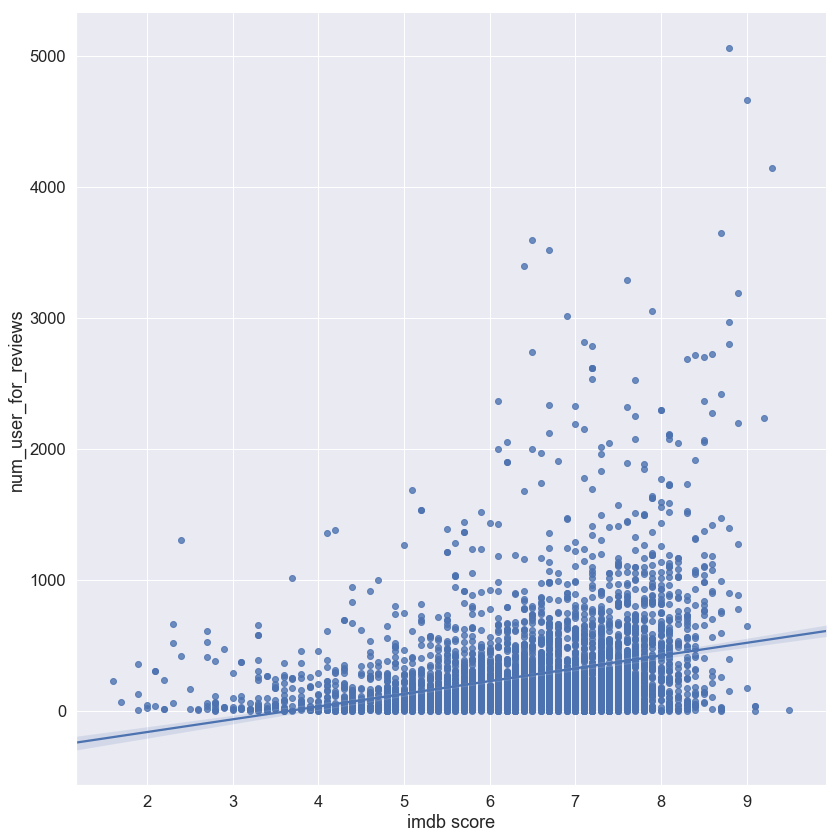

In [181]:
ig = dt[['imdb_score','num_user_for_reviews']]
sns.lmplot(x = 'imdb_score',y = 'num_user_for_reviews',data = ig,height=12)
plt.ylabel('num_user_for_reviews')
plt.xlabel("imdb score")

Text(0.5, 15.439999999999998, 'imdb score')

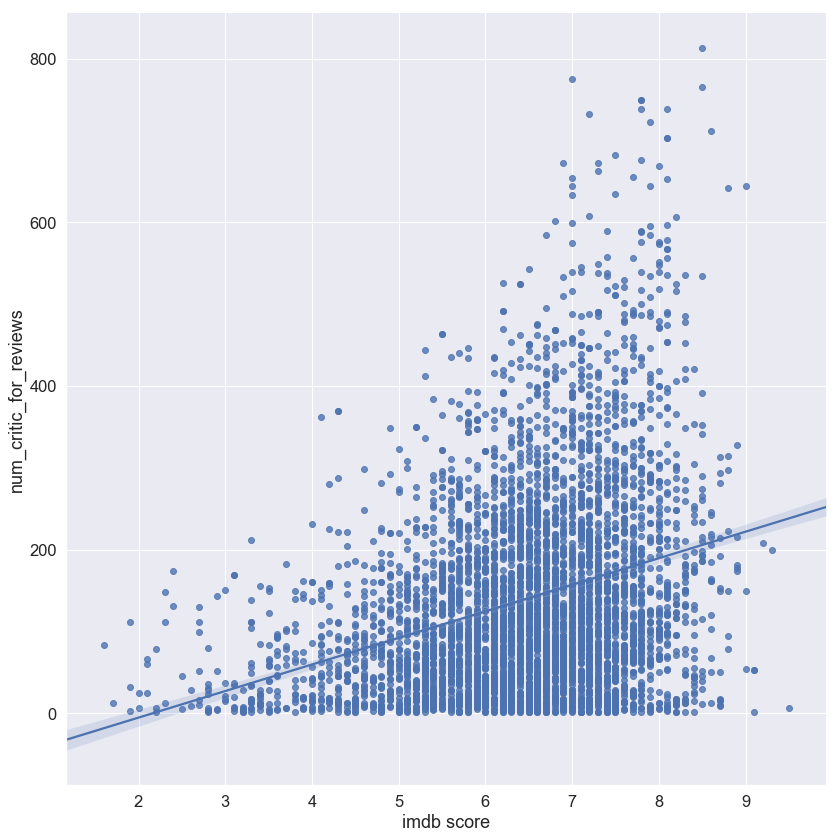

In [182]:
ig = dt[['imdb_score','num_critic_for_reviews']]
sns.lmplot(x = 'imdb_score',y = 'num_critic_for_reviews',data = ig,height=12)
plt.ylabel("num_critic_for_reviews")
plt.xlabel("imdb score")

Based on the heatmap, we can see some high correlations (greater than 0.7) between predictors.

According to the highest correlation value 0.95, we find actor_1_facebook_likes is highly correlated with the cast_total_facebook_likes, and both actor2 and actor3 are also somehow correlated to the total. So we want to modify them into two variables: actor_1_facebook_likes and other_actors_facebook_likes.

From the above two plots, we can see that imdb score has high correlations with num_user_for_reviews and num_critic_for_reviews, so we want to add the ratio of num_user_for_reviews and num_critic_for_reviews.

In [183]:
dt['other_actors_facebook_likes'] = dt['actor_2_facebook_likes'] + dt['actor_3_facebook_likes']
dt['critic_review_ratio'] = dt['num_critic_for_reviews'] / dt['num_user_for_reviews']

dt = dt.drop(columns=['actor_2_facebook_likes','actor_3_facebook_likes'])


## Feature selection

For feature selection, we will implement backward elimination, forward selection and select the features that correlation higher than 0.2

In [184]:
# load statsmodels libraries
import statsmodels.api as sm
import statsmodels.formula.api as smf
# define backward_elimination function with p-value less than .05
def backward_elimination(data, target,significance_level = 0.05):
    features = data.columns.tolist()
    while(len(features)>0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break 
    return features

In [185]:
# # define forward_selection function with p-value less than .05
def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

We will also use all features for each model

In [186]:
all_fea = dt.drop(columns = 'imdb_score')
target = dt['imdb_score']

In [187]:
print(len(all_fea.columns))
all_fea.columns

21


Index(['color', 'language', 'country', 'content_rating',
       'num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_1_facebook_likes', 'gross', 'num_voted_users',
       'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'budget', 'title_year', 'aspect_ratio',
       'movie_facebook_likes', 'profit', 'return_on_investment_perc',
       'other_actors_facebook_likes', 'critic_review_ratio'],
      dtype='object')

In [188]:
# use forward selection to get the features
forward = forward_selection(all_fea,target)
print(len(forward_selection(all_fea,target)))
forward

15


['num_voted_users',
 'title_year',
 'language',
 'num_critic_for_reviews',
 'country',
 'num_user_for_reviews',
 'aspect_ratio',
 'duration',
 'gross',
 'critic_review_ratio',
 'color',
 'facenumber_in_poster',
 'actor_1_facebook_likes',
 'cast_total_facebook_likes',
 'other_actors_facebook_likes']

We implemented forward selection and get 15 features

In [44]:
# use backward elimination to get the features
backward = backward_elimination(all_fea,target)
print(len(backward_elimination(all_fea,target)))
backward

17


['color',
 'language',
 'country',
 'num_critic_for_reviews',
 'duration',
 'actor_1_facebook_likes',
 'gross',
 'num_voted_users',
 'cast_total_facebook_likes',
 'facenumber_in_poster',
 'num_user_for_reviews',
 'budget',
 'title_year',
 'aspect_ratio',
 'profit',
 'other_actors_facebook_likes',
 'critic_review_ratio']

We implemented backward elimination and get 15 features

Use the features that the absolute value of correlation are higher than 0.2

In [190]:
dfcorr = dt.corr()
features = dfcorr.imdb_score[dfcorr.imdb_score.abs()>0.2].index
features = list(features)
features.remove('imdb_score')
print(len(features))
features


6


['num_critic_for_reviews',
 'duration',
 'num_voted_users',
 'num_user_for_reviews',
 'title_year',
 'movie_facebook_likes']

## Machine Learning Models
In this project, we will use three distinct models, for each model, we will use different features to train the model, and compare them, the features are from forward selection, backward elimination, correlation higher than 0.2 and finally we will use all the features

In [191]:
# load sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import cross_validate, cross_val_score

In [192]:
# define a root mean squared error function
def rmse(y_true,y_test):
    return np.sqrt(mean_squared_error(y_true,y_test))

#### Use features From forward selection for each model

In [193]:
# Define X and y, X are explantory varibles, y is target
X = dt[forward]
y = dt['imdb_score']

In [194]:
# split X,y into X_train,y_train,X_test,y_test and test data is 20%
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

KNN model

In [195]:
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)
# fit the model using 5-fold cross validation
knn_r2 = cross_val_score(knn, X = X_train,y = y_train, cv=5, scoring = 'r2').mean()
knn_rmse = np.sqrt(cross_val_score(knn, X = X_train,y = y_train, cv=5,scoring=make_scorer(mean_squared_error)).mean())
print('knn training r2 score is:',knn_r2)
print('knn training rmse is',knn_rmse)
knn_y_pre = knn.predict(X_test)
print()
print('knn testing r2 score is:',r2_score(y_test,knn_y_pre))
print("knn testing rmse is ",rmse(y_test,knn_y_pre))

knn training r2 score is: -0.022918628583948462
knn training rmse is 1.1239676347148368

knn testing r2 score is: -0.028820112687820698
knn testing rmse is  1.1871544043560478


SVR model

In [196]:
svr = SVR()
svr_r2 = cross_val_score(svr,X = X_train,y = y_train,cv = 5,scoring='r2').mean()
svr_rmse = np.sqrt(cross_val_score(knn, X = X_train,y = y_train, cv=5,scoring=make_scorer(mean_squared_error)).mean())
print('svr training r2 score is:',svr_r2)
print('svr training rmse is',svr_rmse)
svr.fit(X_train,y_train)
svr_y_pre = svr.predict(X_test)
print()
print('svr r2 score is:',r2_score(y_test,svr_y_pre))
print("svr rmse is ",rmse(y_test,svr_y_pre))

svr training r2 score is: 0.015526999744610115
svr training rmse is 1.1239676347148368

svr r2 score is: 0.02125873669626155
svr rmse is  1.1579010143089277


RandomForest model

In [197]:
rf = RandomForestRegressor()
rf_r2 = cross_val_score(rf,X = X_train,y = y_train,cv = 5,scoring='r2').mean()
rf_rmse = np.sqrt(cross_val_score(rf, X = X_train,y = y_train, cv=5,scoring=make_scorer(mean_squared_error)).mean())
print('rf training r2 score is:',rf_r2)
print('rf training rmse is',rf_rmse)
rf.fit(X_train,y_train)
print()
rf_y_pre = rf.predict(X_test)
print('rf r2 score is:',r2_score(y_test,rf_y_pre))
print("rf rmse is ",rmse(y_test,rf_y_pre))

rf training r2 score is: 0.46380072308464293
rf training rmse is 0.8189622729694997

rf r2 score is: 0.45917258181761234
rf rmse is  0.8607297926851709


#### Use features From backward  elimination for each model

In [55]:
# Define X and y, X are explantory varibles, y is target
# split X,y into X_train,y_train,X_test,y_test and test data is 20%
X = dt[backward]
y = dt['imdb_score']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

KNN model

In [198]:
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)
# fit the model using 5-fold cross validation
knn_r2 = cross_val_score(knn, X = X_train,y = y_train, cv=5, scoring = 'r2').mean()
knn_rmse = np.sqrt(cross_val_score(knn, X = X_train,y = y_train, cv=5,scoring=make_scorer(mean_squared_error)).mean())
print('knn training r2 score is:',knn_r2)
print('knn training rmse is',knn_rmse)
knn_y_pre = knn.predict(X_test)
print()
print('knn testing r2 score is:',r2_score(y_test,knn_y_pre))
print("knn testing rmse is ",rmse(y_test,knn_y_pre))

knn training r2 score is: -0.022918628583948462
knn training rmse is 1.1239676347148368

knn testing r2 score is: -0.028820112687820698
knn testing rmse is  1.1871544043560478


SVR model

In [199]:
svr = SVR()
svr_r2 = cross_val_score(svr,X = X_train,y = y_train,cv = 5,scoring='r2').mean()
svr_rmse = np.sqrt(cross_val_score(knn, X = X_train,y = y_train, cv=5,scoring=make_scorer(mean_squared_error)).mean())
print('svr training r2 score is:',svr_r2)
print('svr training rmse is',svr_rmse)
svr.fit(X_train,y_train)
svr_y_pre = svr.predict(X_test)
print()
print('svr r2 score is:',r2_score(y_test,svr_y_pre))
print("svr rmse is ",rmse(y_test,svr_y_pre))

svr training r2 score is: 0.015526999744610115
svr training rmse is 1.1239676347148368

svr r2 score is: 0.02125873669626155
svr rmse is  1.1579010143089277


RandomForest model

In [200]:
rf = RandomForestRegressor()
rf_r2 = cross_val_score(rf,X = X_train,y = y_train,cv = 5,scoring='r2').mean()
rf_rmse = np.sqrt(cross_val_score(rf, X = X_train,y = y_train, cv=5,scoring=make_scorer(mean_squared_error)).mean())
print('rf training r2 score is:',rf_r2)
print('rf training rmse is',rf_rmse)
rf.fit(X_train,y_train)
print()
rf_y_pre = rf.predict(X_test)
print('rf r2 score is:',r2_score(y_test,rf_y_pre))
print("rf rmse is ",rmse(y_test,rf_y_pre))

rf training r2 score is: 0.4588713537829071
rf training rmse is 0.8197620375864858

rf r2 score is: 0.4668942869125192
rf rmse is  0.8545631343816571


#### Use features that correlation higher than 0.2 for each model

In [201]:
# Define X and y, X are explantory varibles, y is target
# split X,y into X_train,y_train,X_test,y_test and test data is 20%
X = dt[features]
y = dt['imdb_score']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

KNN model

In [202]:
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)
# fit the model using 5-fold cross validation
knn_r2 = cross_val_score(knn, X = X_train,y = y_train, cv=5, scoring = 'r2').mean()
knn_rmse = np.sqrt(cross_val_score(knn, X = X_train,y = y_train, cv=5,scoring=make_scorer(mean_squared_error)).mean())
print('knn training r2 score is:',knn_r2)
print('knn training rmse is',knn_rmse)
knn_y_pre = knn.predict(X_test)
print()
print('knn testing r2 score is:',r2_score(y_test,knn_y_pre))
print("knn testing rmse is ",rmse(y_test,knn_y_pre))

knn training r2 score is: 0.08685429527404327
knn training rmse is 1.0622638806363365

knn testing r2 score is: 0.09014139733981752
knn testing rmse is  1.1164118510698091


SVR model

In [63]:
svr = SVR()
svr_r2 = cross_val_score(svr,X = X_train,y = y_train,cv = 5,scoring='r2').mean()
svr_rmse = np.sqrt(cross_val_score(knn, X = X_train,y = y_train, cv=5,scoring=make_scorer(mean_squared_error)).mean())
print('svr training r2 score is:',svr_r2)
print('svr training rmse is',svr_rmse)
svr.fit(X_train,y_train)
svr_y_pre = svr.predict(X_test)
print()
print('svr r2 score is:',r2_score(y_test,svr_y_pre))
print("svr rmse is ",rmse(y_test,svr_y_pre))

svr training r2 score is: 0.1774951881938465
svr training rmse is 1.0622638806363365

svr r2 score is: 0.17295278975887152
svr rmse is  1.0643945341411594


RandomForest model

In [203]:
rf = RandomForestRegressor()
rf_r2 = cross_val_score(rf,X = X_train,y = y_train,cv = 5,scoring='r2').mean()
rf_rmse = np.sqrt(cross_val_score(rf, X = X_train,y = y_train, cv=5,scoring=make_scorer(mean_squared_error)).mean())
print('rf training r2 score is:',rf_r2)
print('rf training rmse is',rf_rmse)
rf.fit(X_train,y_train)
print()RandomForest model
rf_y_pre = rf.predict(X_test)
print('rf r2 score is:',r2_score(y_test,rf_y_pre))
print("rf rmse is ",rmse(y_test,rf_y_pre))

rf training r2 score is: 0.4133883957979421
rf training rmse is 0.8507332713104526

rf r2 score is: 0.41327997215580325
rf rmse is  0.8965054659872935


#### Use all features for each model

In [204]:
# Define X and y, X are explantory varibles, y is target
# split X,y into X_train,y_train,X_test,y_test and test data is 20%
X = dt[all_fea.columns]
y = dt['imdb_score']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

KNN model

In [205]:
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)
# fit the model using 5-fold cross validation
knn_r2 = cross_val_score(knn, X = X_train,y = y_train, cv=5, scoring = 'r2').mean()
knn_rmse = np.sqrt(cross_val_score(knn, X = X_train,y = y_train, cv=5,scoring=make_scorer(mean_squared_error)).mean())
print('knn training r2 score is:',knn_r2)
print('knn training rmse is',knn_rmse)
knn_y_pre = knn.predict(X_test)
print()
print('knn testing r2 score is:',r2_score(y_test,knn_y_pre))
print("knn testing rmse is ",rmse(y_test,knn_y_pre))

knn training r2 score is: -0.0694334013145356
knn training rmse is 1.1494864326003893

knn testing r2 score is: -0.06134976973802564
knn testing rmse is  1.205776318899583


SVR model

In [206]:
svr = SVR()
svr_r2 = cross_val_score(svr,X = X_train,y = y_train,cv = 5,scoring='r2').mean()
svr_rmse = np.sqrt(cross_val_score(knn, X = X_train,y = y_train, cv=5,scoring=make_scorer(mean_squared_error)).mean())
print('svr training r2 score is:',svr_r2)
print('svr training rmse is',svr_rmse)
svr.fit(X_train,y_train)
svr_y_pre = svr.predict(X_test)
print()
print('svr r2 score is:',r2_score(y_test,svr_y_pre))
print("svr rmse is ",rmse(y_test,svr_y_pre))

svr training r2 score is: 0.03885044966466171
svr training rmse is 1.1494864326003893

svr r2 score is: 0.017505392392596075
svr rmse is  1.1601190890560893


RandomForest model

In [207]:
rf = RandomForestRegressor()
rf_r2 = cross_val_score(rf,X = X_train,y = y_train,cv = 5,scoring='r2').mean()
rf_rmse = np.sqrt(cross_val_score(rf, X = X_train,y = y_train, cv=5,scoring=make_scorer(mean_squared_error)).mean())
print('rf training r2 score is:',rf_r2)
print('rf training rmse is',rf_rmse)
rf.fit(X_train,y_train)
print()
rf_y_pre = rf.predict(X_test)
print('rf r2 score is:',r2_score(y_test,rf_y_pre))
print("rf rmse is ",rmse(y_test,rf_y_pre))

rf training r2 score is: 0.4982056743627288
rf training rmse is 0.7827329556399056

rf r2 score is: 0.47367436037587596
rf rmse is  0.8491115504887676


Models| Features| R^2_Training | RMSE_Training| R^2_Test |RMSE_Test
 :- | :- |  :- | :- |:- |:-
KNN| Forward|-0.023|1.124| -0.029|1.187
SVR| Forward|0.016|1.124| 0.021|1.158
RF| Forward| 0.457|0.817| 0.445| 0.872
KNN| Backward| -0.069| 1.149|-0.061|1.205
SVR|Backward| 0.039| 1.149|0.018|1.16
RF| Backward| 0.492|0.791|0.471|0.851
KNN|coff>0.2| 0.087|1.062|0.09|1.116
SVR| coff>0.2| 0.178|1.062|0.173|1.064
RF|coff>0.2|0.404|0.854|0.416|0.894
KNN| All features|-0.069|1.149|-0.061|1.206
SVR|All features|0.0389|1.149|0.017|1.16
RF| All features|0.498|0.783|0.474|0.849

From the above results, we can see that the knn and svr models are not very good, the r2 score is close to 0 and the rmse is also relatively high, which may be due to the different orders of magnitude of the different columns, which leads to the poor model effect. In order to eliminate this difference, we will standardize our dataset using standardscaler

## StandardScaler

Apply standardscaler and rerun all the models

#### Use features From forward selection for each model

In [208]:
# import standardscaler
from sklearn.preprocessing import StandardScaler
# Define X and y, X are explantory varibles, y#### Use features From forward selection for each model is target
X = dt[forward]
y = dt['imdb_score']
std = StandardScaler()
X = std.fit_transform(X)

In [209]:
# split X,y into X_train,y_train,X_test,y_test and test data is 20%
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

KNN model

In [212]:
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)
# fit the model using 5-fold cross validation
knn_r2 = cross_val_score(knn, X = X_train,y = y_train, cv=5, scoring = 'r2').mean()
knn_rmse = np.sqrt(cross_val_score(knn, X = X_train,y = y_train, cv=5,scoring=make_scorer(mean_squared_error)).mean())
print('knn training r2 score is:',knn_r2)
print('knn training rmse is',knn_rmse)
knn_y_pre = knn.predict(X_test)
KNN_ = knn_y_pre
print()
print('knn testing r2 score is:',r2_score(y_test,knn_y_pre))
print("knn testing rmse is ",rmse(y_test,knn_y_pre))

knn training r2 score is: 0.3089032591327161
knn training rmse is 0.9242945792437562

knn testing r2 score is: 0.3087153415499201
knn testing rmse is  0.9731189829640338


SVR model

In [213]:
svr = SVR()
svr_r2 = cross_val_score(svr,X = X_train,y = y_train,cv = 5,scoring='r2').mean()
svr_rmse = np.sqrt(cross_val_score(knn, X = X_train,y = y_train, cv=5,scoring=make_scorer(mean_squared_error)).mean())
print('svr training r2 score is:',svr_r2)
print('svr training rmse is',svr_rmse)
svr.fit(X_train,y_train)
svr_y_pre = svr.predict(X_test)
SVR_pre_std = svr_y_pre
print()
print('svr r2 score is:',r2_score(y_test,svr_y_pre))
print("svr rmse is ",rmse(y_test,svr_y_pre))

svr training r2 score is: 0.399073980842775
svr training rmse is 0.9242945792437562

svr r2 score is: 0.3944133268586628
svr rmse is  0.9108054902247359


RandomForest model

In [214]:
rf = RandomForestRegressor()
rf_r2 = cross_val_score(rf,X = X_train,y = y_train,cv = 5,scoring='r2').mean()
rf_rmse = np.sqrt(cross_val_score(rf, X = X_train,y = y_train, cv=5,scoring=make_scorer(mean_squared_error)).mean())
print('rf training r2 score is:',rf_r2)
print('rf training rmse is',rf_rmse)
rf.fit(X_train,y_train)
print()
rf_y_pre = rf.predict(X_test)
print('rf r2 score is:',r2_score(y_test,rf_y_pre))
print("rf rmse is ",rmse(y_test,rf_y_pre))

rf training r2 score is: 0.4616924695773032
rf training rmse is 0.8144166421614288

rf r2 score is: 0.4641455070165337
rf rmse is  0.8567634351127991


#### Use features From backward  elimination for each model

In [215]:
# Define X and y, X are explantory varibles, y is target
# split X,y into X_train,y_train,X_test,y_test and test data is 20%
X = dt[backward]
y = dt['imdb_score']
std = StandardScaler()
X = std.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

KNN model

In [216]:
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)
# fit the model using 5-fold cross validation
knn_r2 = cross_val_score(knn, X = X_train,y = y_train, cv=5, scoring = 'r2').mean()
knn_rmse = np.sqrt(cross_val_score(knn, X = X_train,y = y_train, cv=5,scoring=make_scorer(mean_squared_error)).mean())
print('knn training r2 score is:',knn_r2)
print('knn training rmse is',knn_rmse)
knn_y_pre = knn.predict(X_test)
print()
print('knn testing r2 score is:',r2_score(y_test,knn_y_pre))
print("knn testing rmse is ",rmse(y_test,knn_y_pre))

knn training r2 score is: 0.31726379896119694
knn training rmse is 0.9187441916565755

knn testing r2 score is: 0.3069216596461153
knn testing rmse is  0.974380644937562


SVR model

In [217]:
svr = SVR()
svr_r2 = cross_val_score(svr,X = X_train,y = y_train,cv = 5,scoring='r2').mean()
svr_rmse = np.sqrt(cross_val_score(knn, X = X_train,y = y_train, cv=5,scoring=make_scorer(mean_squared_error)).mean())
print('svr training r2 score is:',svr_r2)
print('svr training rmse is',svr_rmse)
svr.fit(X_train,y_train)
svr_y_pre = svr.predict(X_test)
print()
print('svr r2 score is:',r2_score(y_test,svr_y_pre))
print("svr rmse is ",rmse(y_test,svr_y_pre))

svr training r2 score is: 0.42513549879762225
svr training rmse is 0.9187441916565755

svr r2 score is: 0.3943589520632156
svr rmse is  0.9108463792937802


RandomForest model

In [218]:
rf = RandomForestRegressor()
rf_r2 = cross_val_score(rf,X = X_train,y = y_train,cv = 5,scoring='r2').mean()
rf_rmse = np.sqrt(cross_val_score(rf, X = X_train,y = y_train, cv=5,scoring=make_scorer(mean_squared_error)).mean())
print('rf training r2 score is:',rf_r2)
print('rf training rmse is',rf_rmse)
rf.fit(X_train,y_train)
print()
rf_y_pre = rf.predict(X_test)
print('rf r2 score is:',r2_score(y_test,rf_y_pre))
print("rf rmse is ",rmse(y_test,rf_y_pre))

rf training r2 score is: 0.49360381759587507
rf training rmse is 0.790403103173648

rf r2 score is: 0.48076720241850923
rf rmse is  0.8433707676546479


#### Use features that correlation higher than 0.2 for each model

In [219]:
# Define X and y, X are explantory varibles, y is target
# split X,y into X_train,y_train,X_test,y_test and test data is 20%
X = dt[features]
y = dt['imdb_score']
std = StandardScaler()
X = std.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

KNN model

In [220]:
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)
# fit the model using 5-fold cross validation
knn_r2 = cross_val_score(knn, X = X_train,y = y_train, cv=5, scoring = 'r2').mean()
knn_rmse = np.sqrt(cross_val_score(knn, X = X_train,y = y_train, cv=5,scoring=make_scorer(mean_squared_error)).mean())
print('knn training r2 score is:',knn_r2)
print('knn training rmse is',knn_rmse)
knn_y_pre = knn.predict(X_test)
print()
print('knn testing r2 score is:',r2_score(y_test,knn_y_pre))
print("knn testing rmse is ",rmse(y_test,knn_y_pre))

knn training r2 score is: 0.2629714981228176
knn training rmse is 0.9544498335027876

knn testing r2 score is: 0.30771373892502996
knn testing rmse is  0.9738237040353505


SVR model

In [221]:
svr = SVR()
svr_r2 = cross_val_score(svr,X = X_train,y = y_train,cv = 5,scoring='r2').mean()
svr_rmse = np.sqrt(cross_val_score(knn, X = X_train,y = y_train, cv=5,scoring=make_scorer(mean_squared_error)).mean())
print('svr training r2 score is:',svr_r2)
print('svr training rmse is',svr_rmse)
svr.fit(X_train,y_train)
svr_y_pre = svr.predict(X_test)
print()
print('svr r2 score is:',r2_score(y_test,svr_y_pre))
print("svr rmse is ",rmse(y_test,svr_y_pre))

svr training r2 score is: 0.3784261130796958
svr training rmse is 0.9544498335027876

svr r2 score is: 0.35694805998770196
svr rmse is  0.9385566940942481


RandomForest model

In [222]:
rf = RandomForestRegressor()
rf_r2 = cross_val_score(rf,X = X_train,y = y_train,cv = 5,scoring='r2').mean()
rf_rmse = np.sqrt(cross_val_score(rf, X = X_train,y = y_train, cv=5,scoring=make_scorer(mean_squared_error)).mean())
print('rf training r2 score is:',rf_r2)
print('rf training rmse is',rf_rmse)
rf.fit(X_train,y_train)
print()
rf_y_pre = rf.predict(X_test)
print('rf r2 score is:',r2_score(y_test,rf_y_pre))
print("rf rmse is ",rmse(y_test,rf_y_pre))

rf training r2 score is: 0.4107055541932748
rf training rmse is 0.8562388802037504

rf r2 score is: 0.406853409288926
rf rmse is  0.9014019732305365


#### Use all features for each model

In [223]:
# Define X and y, X are explantory varibles, y is target
# split X,y into X_train,y_train,X_test,y_test and test data is 20%
X = dt[all_fea.columns]
y = dt['imdb_score']
std = StandardScaler()
X = std.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

KNN model

In [224]:
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)
# fit the model using 5-fold cross validation
knn_r2 = cross_val_score(knn, X = X_train,y = y_train, cv=5, scoring = 'r2').mean()
knn_rmse = np.sqrt(cross_val_score(knn, X = X_train,y = y_train, cv=5,scoring=make_scorer(mean_squared_error)).mean())
print('knn training r2 score is:',knn_r2)
print('knn training rmse is',knn_rmse)
knn_y_pre = knn.predict(X_test)
print()
print('knn testing r2 score is:',r2_score(y_test,knn_y_pre))
print("knn testing rmse is ",rmse(y_test,knn_y_pre))

knn training r2 score is: 0.30659878455181044
knn training rmse is 0.9259326763996635

knn testing r2 score is: 0.291970837685102
knn testing rmse is  0.9848340555380245


SVR model

In [225]:
svr = SVR()
svr_r2 = cross_val_score(svr,X = X_train,y = y_train,cv = 5,scoring='r2').mean()
svr_rmse = np.sqrt(cross_val_score(knn, X = X_train,y = y_train, cv=5,scoring=make_scorer(mean_squared_error)).mean())
print('svr training r2 score is:',svr_r2)
print('svr training rmse is',svr_rmse)
svr.fit(X_train,y_train)
svr_y_pre = svr.predict(X_test)
print()
print('svr r2 score is:',r2_score(y_test,svr_y_pre))
print("svr rmse is ",rmse(y_test,svr_y_pre))

svr training r2 score is: 0.43088349736325193
svr training rmse is 0.9259326763996635

svr r2 score is: 0.40407905109528275
svr rmse is  0.903507603197043


RandomForest model

In [231]:
rf = RandomForestRegressor()
rf_r2 = cross_val_score(rf,X = X_train,y = y_train,cv = 5,scoring='r2').mean()
rf_rmse = np.sqrt(cross_val_score(rf, X = X_train,y = y_train, cv=5,scoring=make_scorer(mean_squared_error)).mean())
print('rf training r2 score is:',rf_r2)
print('rf training rmse is',rf_rmse)
rf.fit(X_train,y_train)
print()
rf_y_pre = rf.predict(X_test)
RF_std_pre = rf_y_pre
print('rf r2 score is:',r2_score(y_test,rf_y_pre))
print("rf rmse is ",rmse(y_test,rf_y_pre))

rf training r2 score is: 0.5099663401254524
rf training rmse is 0.7774347437457013

rf r2 score is: 0.4813961110507924
rf rmse is  0.8428598563009905


Models| Features| R^2_Training | RMSE_Training| R^2_Test |RMSE_Test
 :- | :- |  :- | :- |:- |:-
KNN| Forward|0.309|0.924| 0.309|0.973
SVR| Forward|0.399|0.924| 0.394|0.91
RF| Forward| 0.46|0.817| 0.464| 0.863
KNN| Backward| 0.317| 0.918|0.307|0.97
SVR|Backward| 0.425| 0.919|0.394|0.918
RF| Backward| 0.494|0.79|0.481|0.843
KNN|coff>0.2| 0.263|0.954|0.308|0.974
SVR| coff>0.2| 0.378|0.954|0.357|0.939
RF|coff>0.2|0.411|0.856|0.407|0.901
KNN| All features|0.307|0.926|0.292|0.985
SVR|All features|0.431|0.926|0.404|0.904
RF| All features|0.509|0.777|0.481|0.842

From the result we can see that the r2 score of knn and svr model has been greatly improved, and the rmse has also been reduced, also, the r2 socre of random forest has slightly increase and rmse has decreased slightly.

### Model Selection

For comparison, we have copied two tables here

Table Without standardscaler

Models| Features| R^2_Training | RMSE_Training| R^2_Test |RMSE_Test
 :- | :- |  :- | :- |:- |:-
KNN| Forward|-0.023|1.124| -0.029|1.187
SVR| Forward|0.016|1.124| 0.021|1.158
RF| Forward| 0.457|0.817| 0.445| 0.872
KNN| Backward| -0.069| 1.149|-0.061|1.205
SVR|Backward| 0.039| 1.149|0.018|1.16
RF| Backward| 0.492|0.791|0.471|0.851
KNN|coff>0.2| 0.087|1.062|0.09|1.116
SVR| coff>0.2| 0.178|1.062|0.173|1.064
RF|coff>0.2|0.404|0.854|0.416|0.894
KNN| All features|-0.069|1.149|-0.061|1.206
SVR|All features|0.0389|1.149|0.017|1.16
RF| All features|0.498|0.783|0.474|0.849

Table with standardscaler

Models| Features| R^2_Training | RMSE_Training| R^2_Test |RMSE_Test
 :- | :- |  :- | :- |:- |:-
KNN| Forward|0.309|0.924| 0.309|0.973
SVR| Forward|0.399|0.924| 0.394|0.91
RF| Forward| 0.46|0.817| 0.464| 0.863
KNN| Backward| 0.317| 0.918|0.307|0.97
SVR|Backward| 0.425| 0.919|0.394|0.918
RF| Backward| 0.494|0.79|0.481|0.843
KNN|coff>0.2| 0.263|0.954|0.308|0.974
SVR| coff>0.2| 0.378|0.954|0.357|0.939
RF|coff>0.2|0.411|0.856|0.407|0.901
KNN| All features|0.307|0.926|0.292|0.985
SVR|All features|0.431|0.926|0.404|0.904
RF| All features|0.509|0.777|0.481|0.842

from the distinct three models we selected for the Project, each model have eight defferent subset (including standardscaler), so we have total 24 subset, from the above two tables, after we compare all the subset, we think random forest with all features and with standardscaler is the best model, it havs highest r2 score in both training and test data, and also have lowest rmse in both training and test data, random forest is our preferred model, it perform as well as expected,

### Ensemble Model

Next, we try to combine the models, combining the three models of svr, knn and rf. There are various combination methods. Here we use a weighted method to combine the models. The weight of the rf model is 0.75, the weight of knn is 0.05 and the weight of svr is 0.2. It can be seen from the final output result that the result of the combined model has been slightly improved, the ensemble approach outperform all of the individual models also outperform our best model, the r2 increased from 0.481 to 0.491, rmse reduced from 0.842 to 0.835

In [242]:
y_pre = RF_std_pre * 0.75 + KNN_pre_std * 0.05 + SVR_pre_std * 0.2
print('Combination model r2 score is:',r2_score(y_test,y_pre))
print("Combination model rmse is ",rmse(y_test,y_pre))

Combination model r2 score is: 0.490665549023392
Combination model rmse is  0.835293326059268


### Conclusions
Our object for this project is to find the best model to build a movie grading model based on a large amount of movie data, and based on the existing movie data to predict the IMDB score of the movie. we think this combination model is satisfied with the research question. 
For the potential future extensions of the work, we think we can use NLP to analyze the "plot_keywords" feature, it will be very useful for our model, also we want to enrich our dataset, which means find another dataset that relative ours so that we can build a more powerful model